___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import tensorflow as tf

tf.__version__

'2.14.0'

In [4]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact


# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact
#data
import numpy as np
import pandas as pd
#tensorflow/keras
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
#sklearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#model saving
import pickle
from keras.models import load_model
from livelossplot import PlotLossesKeras

In [73]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [7]:
from keras.optimizers.legacy import Adam

In [8]:
from matplotlib import style
style.use('dark_background')

In [9]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [10]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# No null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# No duplicates
df.duplicated().sum()

0

In [15]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [16]:
df.describe(include=["object"]).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [17]:
df = df.drop(columns=["CustomerId", "RowNumber", "Surname"])
# Dropping columns that have no impact to prediction

<Axes: ylabel='Gender,Exited'>

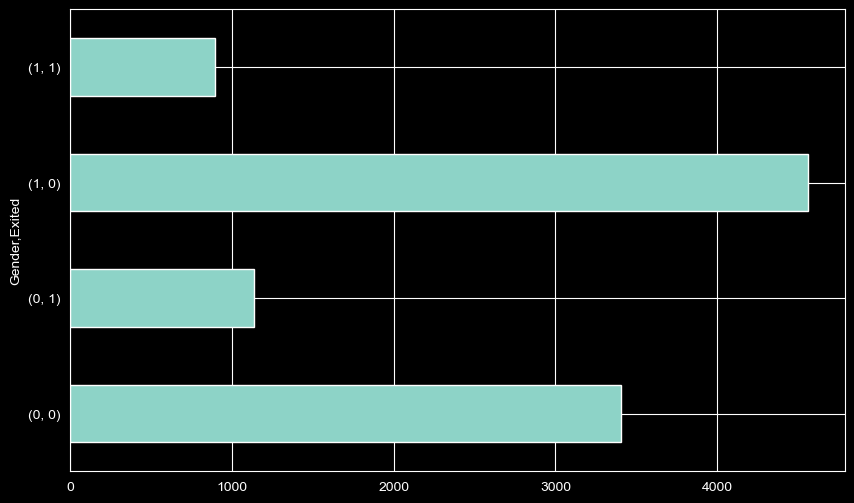

In [415]:
df.groupby("Gender")["Exited"].value_counts().plot(kind="barh")
# This plot tells us that females are the least likely group to not exit

<Axes: ylabel='Geography,Exited'>

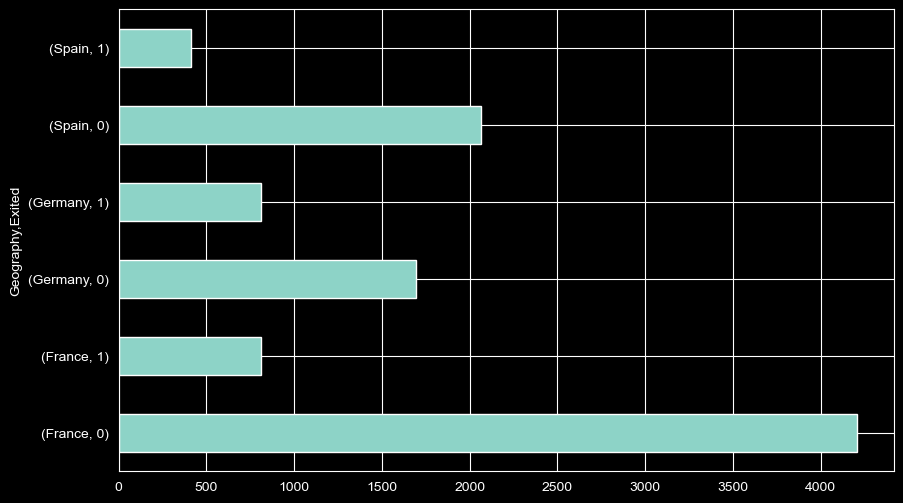

In [416]:
df.groupby("Geography")["Exited"].value_counts().plot(kind="barh")
# This plot tells us that people from France are the least likely group to not exit

<Axes: ylabel='HasCrCard,Exited'>

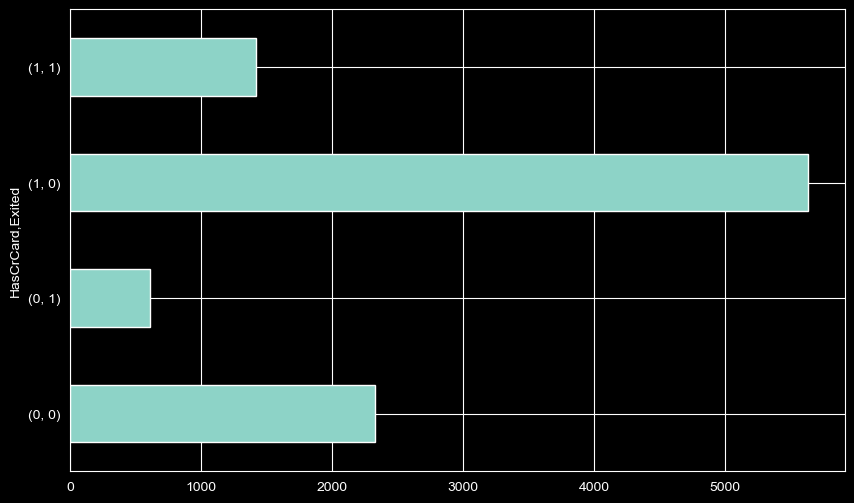

In [417]:
df.groupby("HasCrCard")["Exited"].value_counts().plot(kind="barh")
# From this plot, we can see that if the person has a credit card, they're unlikely to exit.

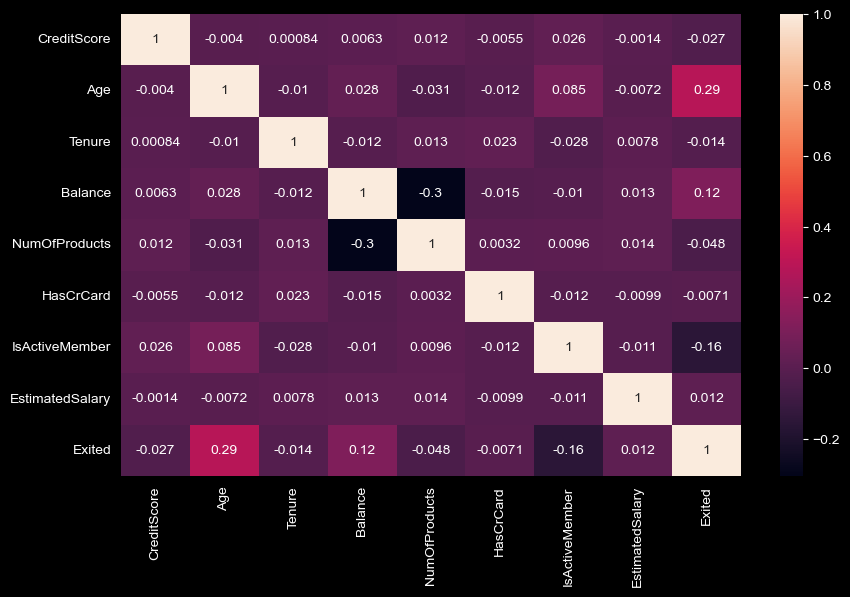

In [18]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()
# No strong correlation

In [19]:
fig = px.imshow(round(df.corr(numeric_only=True), 2), text_auto=True, aspect="auto")
fig.show()

In [20]:
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn

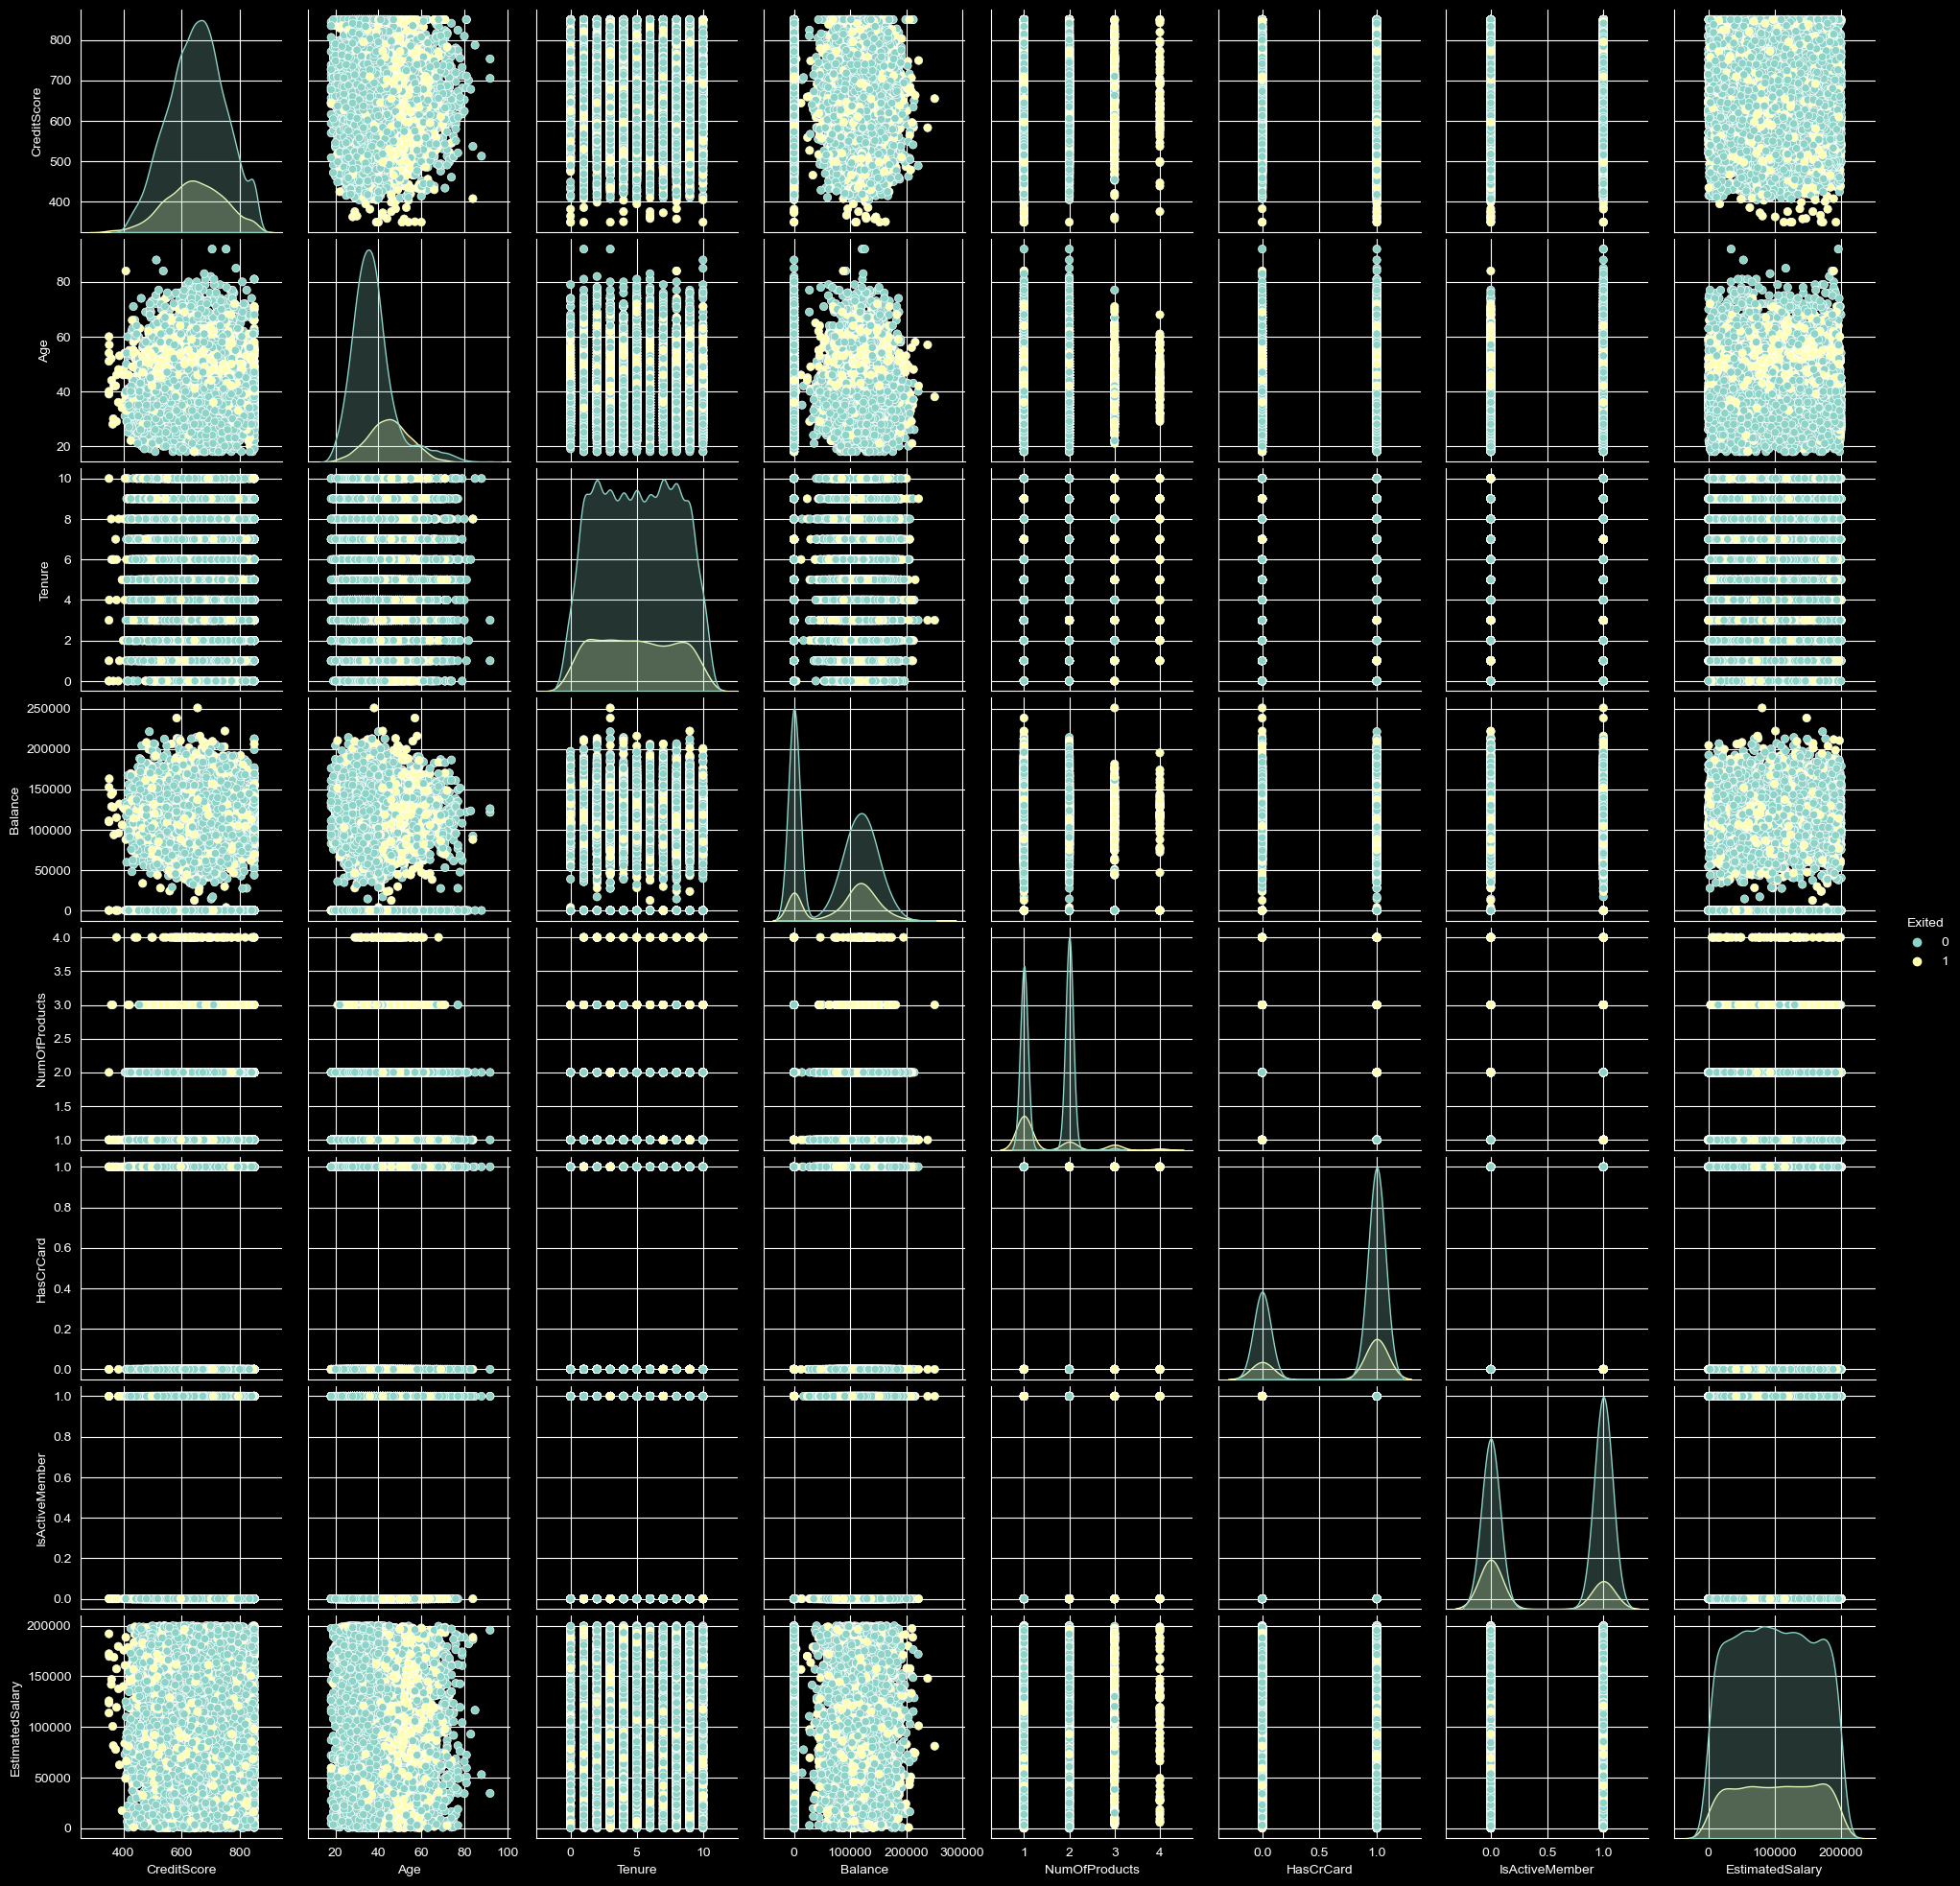

In [21]:
sns.pairplot(df, hue = 'Exited')
plt.show();
# Very overlapped features

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

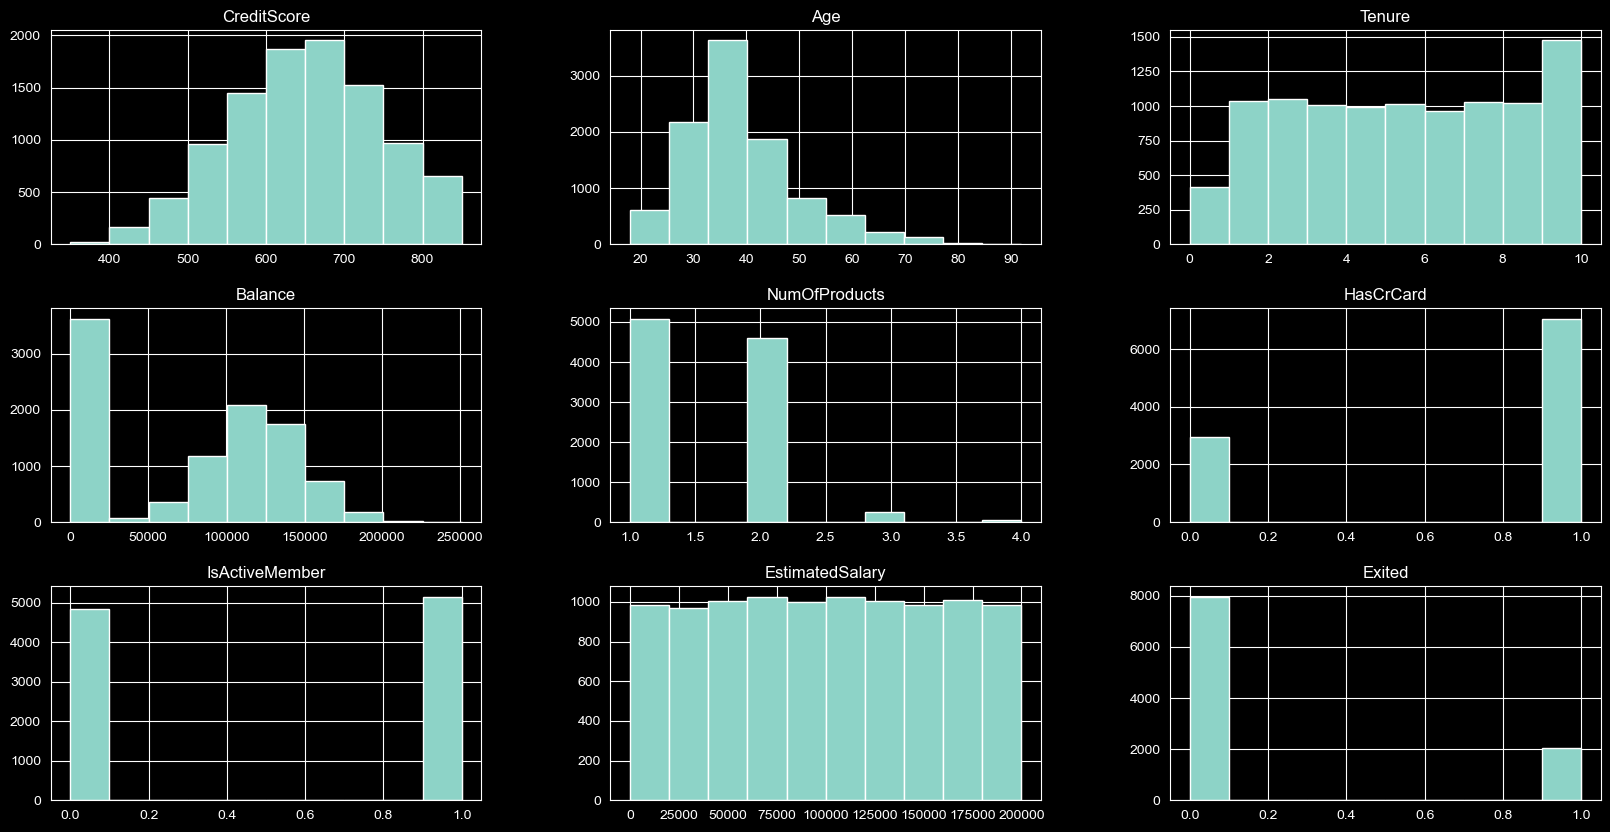

In [22]:
df.hist(figsize=(20,10))

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn

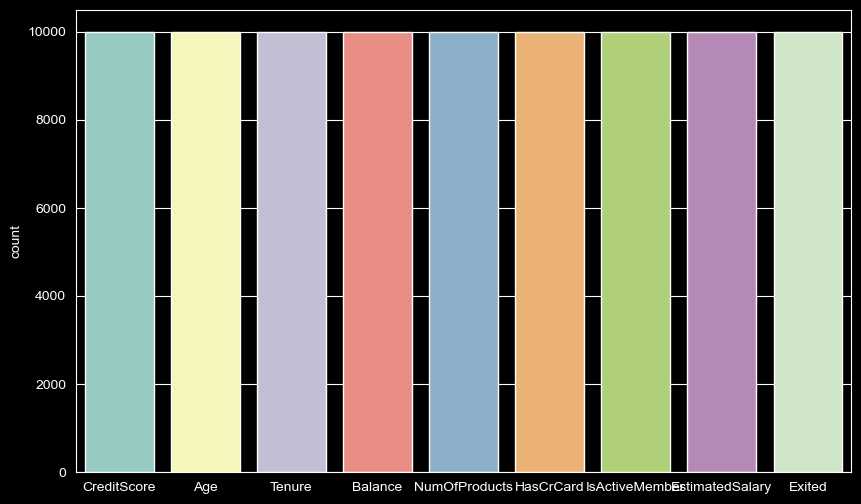

In [23]:
sns.countplot(df)
plt.show();

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101348.880       1  
1          0               1       112542.580       0  
2          1               0       113931.570       1  
3          0               0        93826.630       0  
4          1               1        79084.100       0

## Columns to Encode:

- Gender --> Binary Encoder
- Geography --> One Hot Encoder

In [26]:
df.describe(include=["object"]).T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [27]:
df["Gender"] = df["Gender"].map({"Male" : 1, "Female": 0})

In [28]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2      0.000              1   
1             608     Spain       0   41       1  83807.860              1   
2             502    France       0   42       8 159660.800              3   
3             699    France       0   39       1      0.000              2   
4             850     Spain       0   43       2 125510.820              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5      0.000              2   
9996          516    France       1   35      10  57369.610              1   
9997          709    France       0   36       7      0.000              1   
9998          772   Germany       1   42       3  75075.310              2   
9999          792    France       0   28       4 130142.790              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1       101348.880       1  
1             0               1       112542.580       0  
2             1               0       113931.570       1  
3             0               0        93826.630       0  
4             1               1        79084.100       0  
...         ...             ...              ...     ...  
9995          1               0        96270.640       0  
9996          1               1       101699.770       0  
9997          0               1        42085.580       1  
9998          1               0        92888.520       1  
9999          1               0        38190.780       0  

[10000 rows x 11 columns]

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
minmax = MinMaxScaler()

In [30]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [31]:
scale_these = ['CreditScore', 'Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'EstimatedSalary']
# The columns to be scaled by our MinMaxScaler()

In [32]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              ["Geography"]),
                              (minmax, scale_these),
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False)

In [33]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [36]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
X_val = column_trans.transform(X_val)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [37]:
X_train.shape

(8100, 12)

In [38]:
X_test.shape

(1000, 12)

In [39]:
X_val.shape

(900, 12)

# Modelling & Model Performance

## without class_weight

### Create The Model

In [52]:
def seedsetter():
    SEED = 42
    import os
    import random
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

In [53]:
seed = 42

In [54]:
seedsetter()

In [201]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

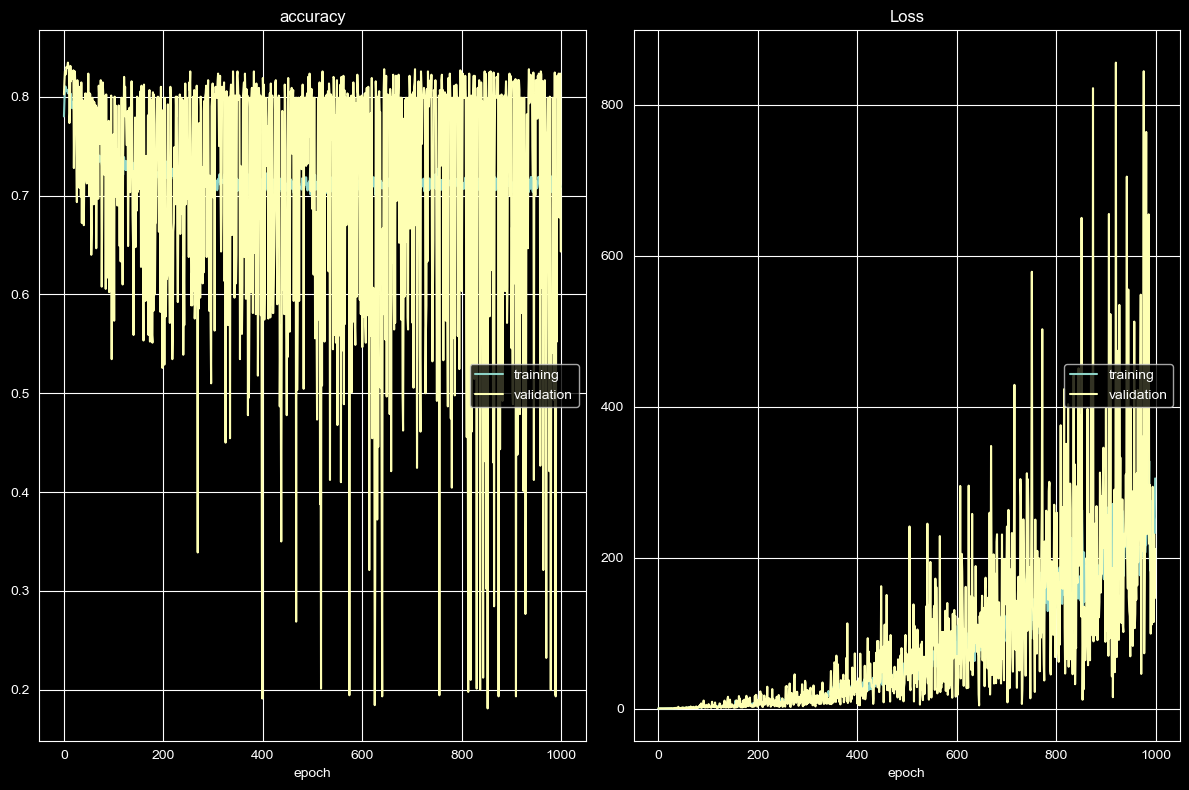

accuracy
	training         	 (min:    0.699, max:    0.810, cur:    0.709)
	validation       	 (min:    0.181, max:    0.834, cur:    0.643)
Loss
	training         	 (min:    0.437, max:  359.967, cur:  305.090)
	validation       	 (min:    0.406, max:  855.954, cur:  211.627)
254/254 [==============================] - 3s 10ms/step - loss: 305.0903 - accuracy: 0.7088 - val_loss: 211.6272 - val_accuracy: 0.6433


In [55]:
# Prior to creating validation data
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, callbacks=[PlotLossesKeras()]
)

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.535     0.780     0.453         0.802
1 0.459     0.796     0.432         0.816
2 0.443     0.805     0.414         0.826
3 0.438     0.810     0.410         0.822
4 0.437     0.808     0.410         0.823

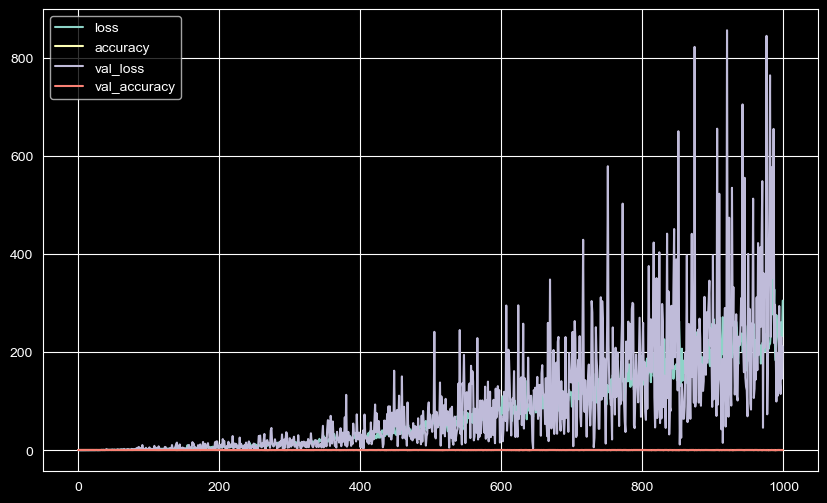

In [58]:
loss_df.plot()
plt.show()
# Why does it look like this?

In [43]:
scores = []

In [60]:
model1 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model1)

In [63]:
print(scores)

[[195.9048614501953, 0.6660000085830688]]


In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)
# These scores are very bad.

loss:  195.9048614501953
accuracy:  0.6660000085830688


In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 4ms/step
[[624 172]
 [162  42]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       796
           1       0.20      0.21      0.20       204

    accuracy                           0.67      1000
   macro avg       0.50      0.49      0.49      1000
weighted avg       0.67      0.67      0.67      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [70]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [91]:
from sklearn import metrics

auc = metrics.auc(fpr, tpr)
print(auc)
# This is not an optimal score

0.4949009754655631


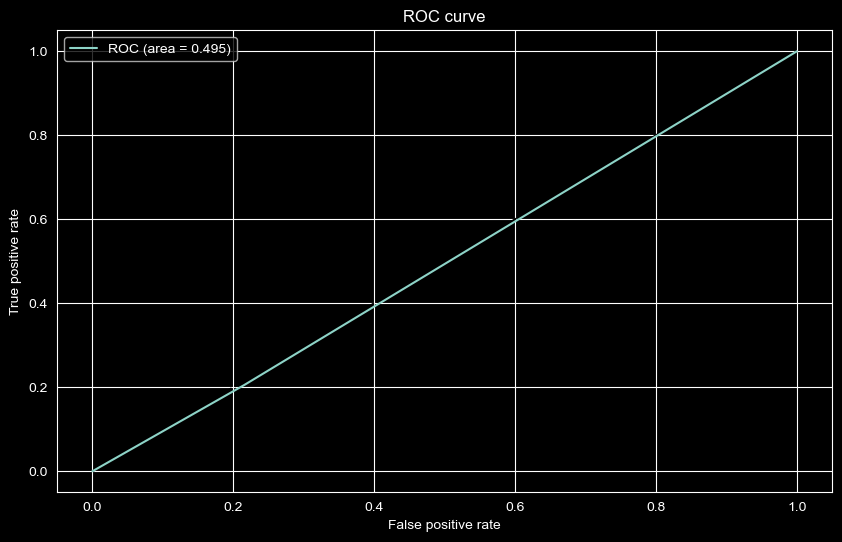

In [72]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation Data

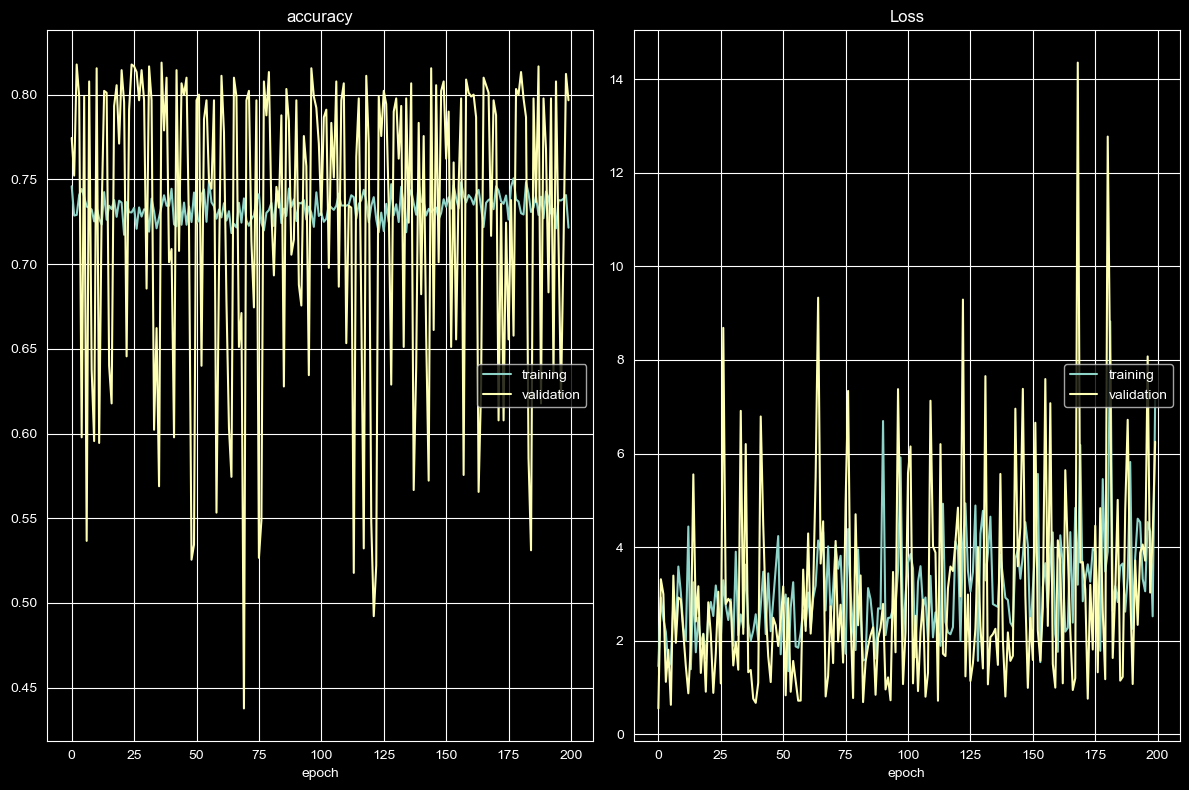

accuracy
	training         	 (min:    0.717, max:    0.751, cur:    0.721)
	validation       	 (min:    0.438, max:    0.819, cur:    0.797)
Loss
	training         	 (min:    1.350, max:    8.824, cur:    7.140)
	validation       	 (min:    0.555, max:   14.351, cur:    6.252)
64/64 [==============================] - 1s 12ms/step - loss: 7.1400 - accuracy: 0.7215 - val_loss: 6.2520 - val_accuracy: 0.7967


In [227]:
# With validation data
model.fit(
    x=X_train, y=y_train, validation_data=(X_val,y_val), batch_size=128, epochs=200, verbose=1, callbacks=[PlotLossesKeras()]
)

In [228]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                468       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 1.457     0.746     0.555         0.774
1 2.924     0.729     3.314         0.752
2 2.467     0.729     2.998         0.818
3 2.187     0.741     1.123         0.799
4 1.441     0.744     1.808         0.598

In [230]:
import matplotlib.pyplot as plt

def plot_subplots():
    
    loss_df = pd.DataFrame(model.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["accuracy", "val_accuracy"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Accuracy Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

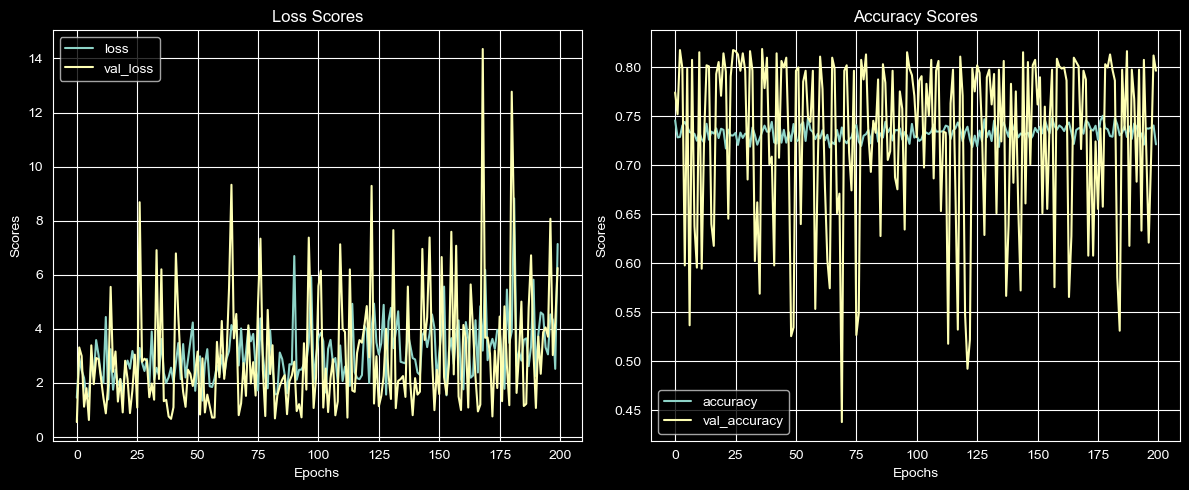

In [231]:
plot_subplots()

In [232]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  6.193724155426025
accuracy:  0.7960000038146973


In [233]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

def plotRoc():
    y_pred = model.predict(X_test) > 0.5
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    display.plot()

32/32 [==============================] - 0s 3ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

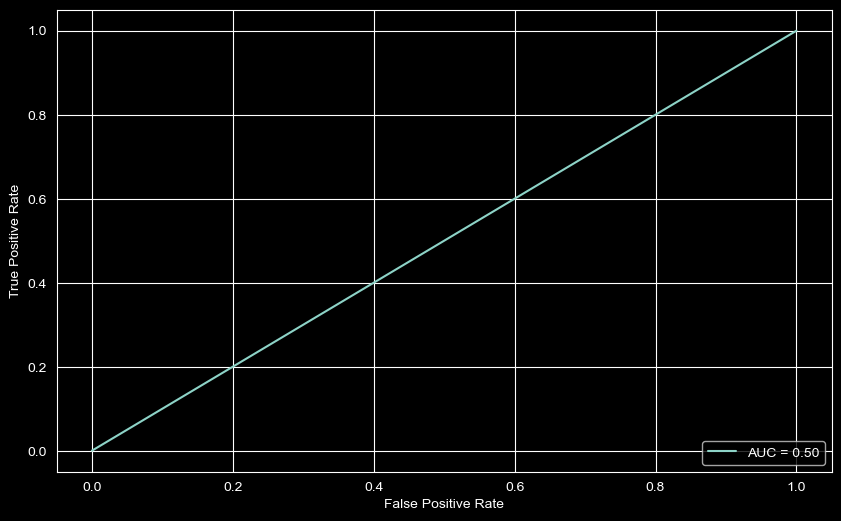

In [234]:
plotRoc()

In [235]:
losses2 = []
accuracies2 = []
aucscores2 = []

def keepscores(modelname):
    y_pred = model.predict(X_test) > 0.5
    report1 = (classification_report(y_test, y_pred, output_dict=True))
    test1 = pd.DataFrame(report1["0"], index=np.arange(1))
    test1.insert(0, "Class", "Not Exited (0)")
    test1.insert(0, "Model", modelname)
    test2 = pd.DataFrame(report1["1"], index=np.arange(1))
    test2["Model"] = modelname
    test2["Class"] = "Exited (1)"
    frames = [test1, test2]
    miniresult = pd.concat(frames)
    return miniresult


def keepotherscores():
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    losses2.append(loss)
    accuracies2.append(accuracy)
    aucscores2.append(auc)
    

In [238]:
modelA = keepscores("Vanilla")
allframes = [modelA]

32/32 [==============================] - 0s 3ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [239]:
print(losses2)

[]


In [240]:
keepotherscores()

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [241]:
print(losses2)

[6.193724155426025]


In [242]:
def evalreport():
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("loss: ", loss)
    print("accuracy: ", accuracy)
    y_pred = model.predict(X_test) > 0.5
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [243]:
evalreport()

loss:  6.193724155426025
accuracy:  0.7960000038146973
32/32 [==============================] - 0s 2ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [244]:
def plotconfusion():
    # Make predictions on the test and training sets
    y_pred = model.predict(X_test) > 0.5
    y_train_pred = model.predict(X_train) > 0.5
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training Confusion
    
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title('Training Set Confusion Matrix')

# Testing Confusion Matrix

    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title('Testing Set Confusion Matrix')

    plt.show()

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

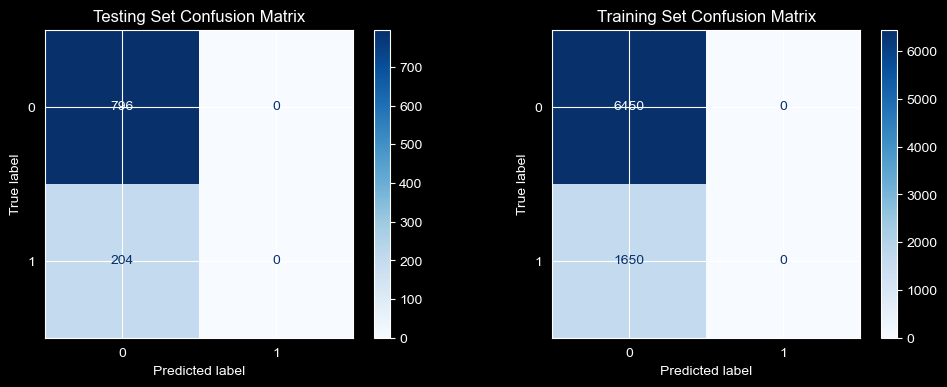

In [245]:
plotconfusion()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [196]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [197]:
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [78]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

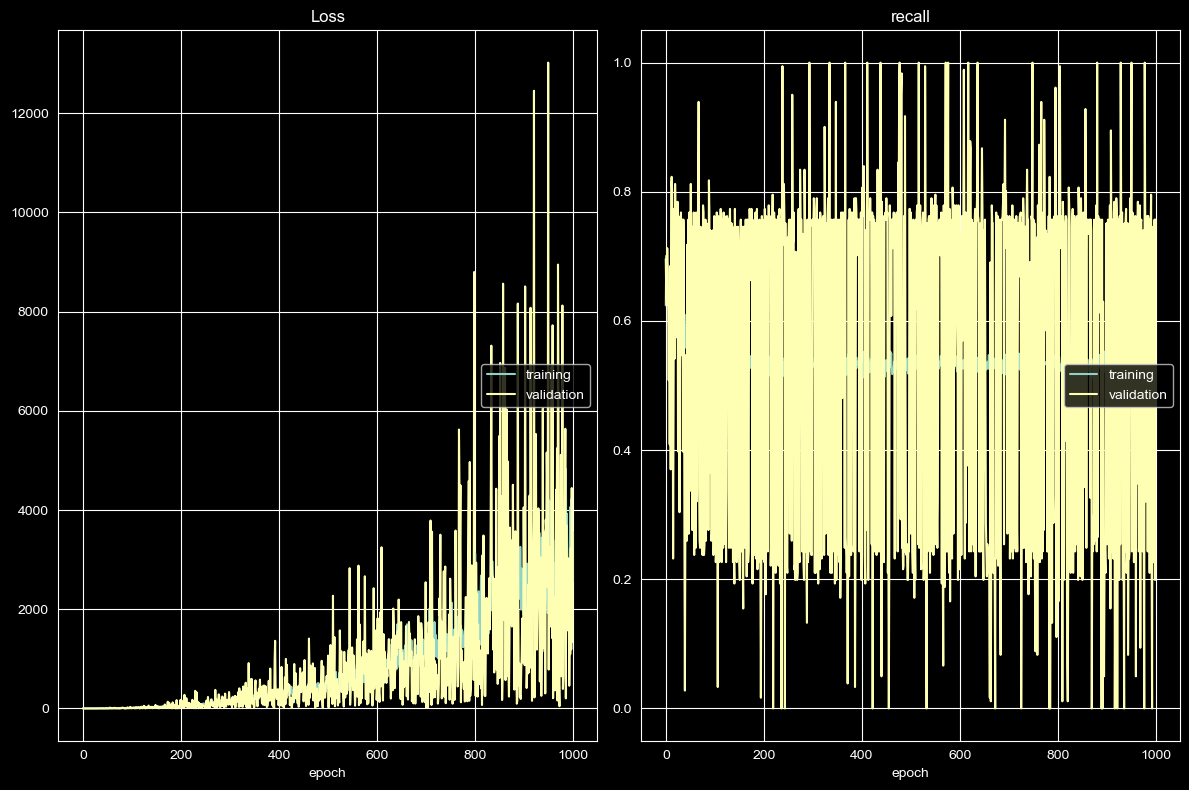

Loss
	training         	 (min:    0.587, max: 4828.668, cur: 3545.984)
	validation       	 (min:    0.428, max: 13021.213, cur: 3531.323)
recall
	training         	 (min:    0.507, max:    0.701, cur:    0.528)
	validation       	 (min:    0.000, max:    1.000, cur:    0.757)
254/254 [==============================] - 2s 9ms/step - loss: 3545.9841 - recall: 0.5278 - val_loss: 3531.3232 - val_recall: 0.7569


In [79]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
model.history.history
# ??

{}

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [80]:
model2 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model2)

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  3742.75439453125
accuracy:  0.7401960492134094


In [82]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[351 445]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.58       796
           1       0.25      0.74      0.38       204

    accuracy                           0.50      1000
   macro avg       0.56      0.59      0.48      1000
weighted avg       0.74      0.50      0.54      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [83]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [92]:
auc2 = metrics.auc(fpr, tpr)
print(auc2)

0.5905754261503597


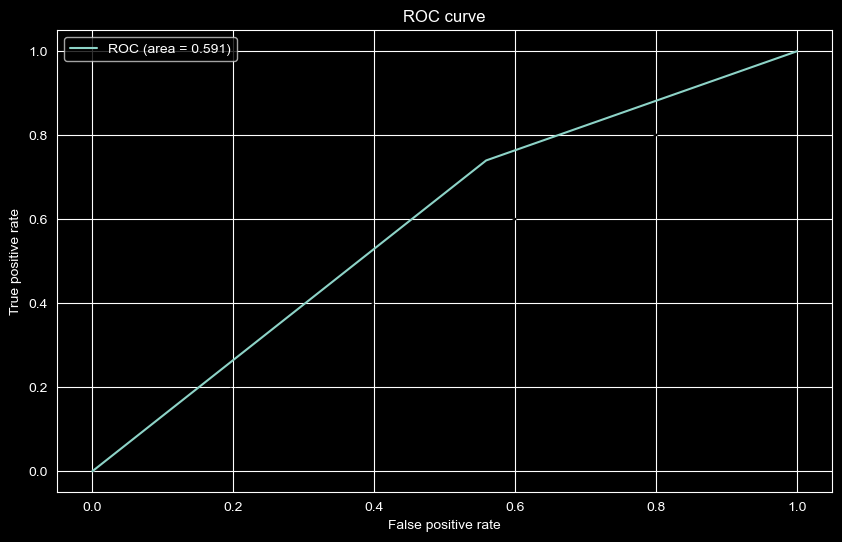

In [93]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation

In [252]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

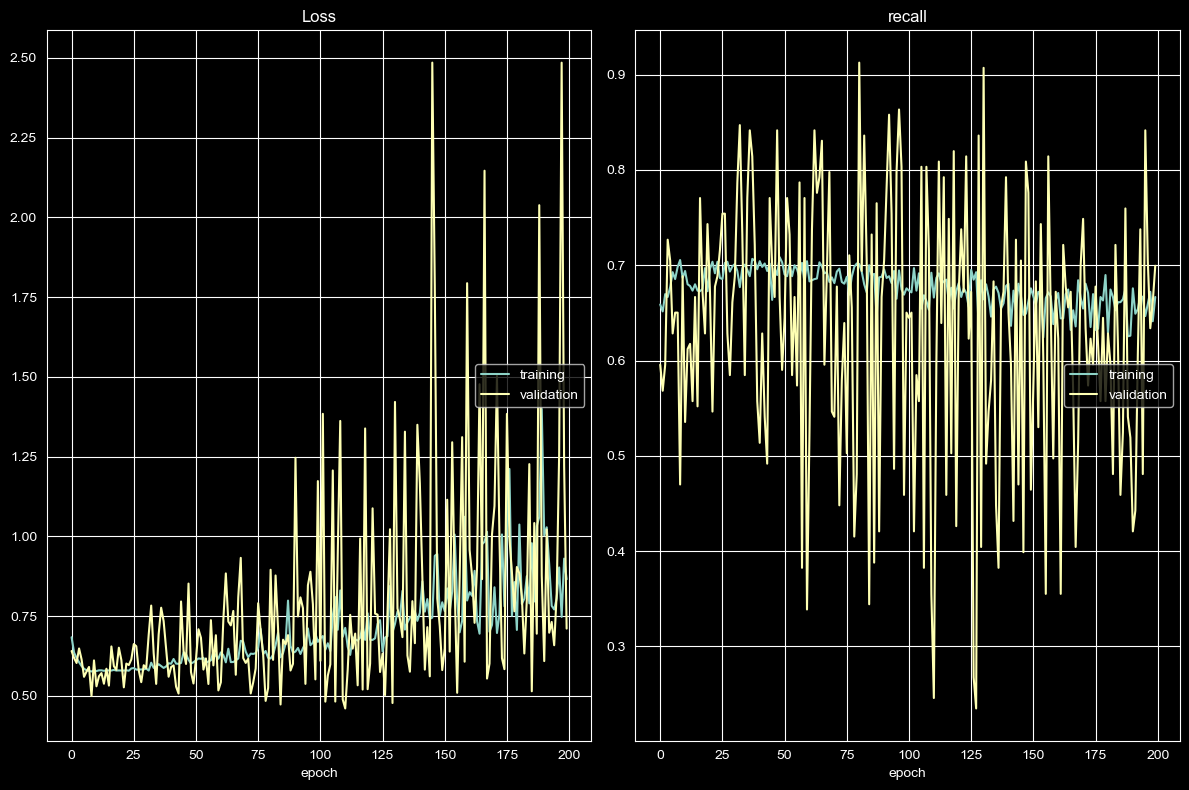

Loss
	training         	 (min:    0.576, max:    1.400, cur:    0.866)
	validation       	 (min:    0.461, max:    2.485, cur:    0.711)
recall
	training         	 (min:    0.624, max:    0.708, cur:    0.667)
	validation       	 (min:    0.235, max:    0.913, cur:    0.699)
64/64 [==============================] - 1s 15ms/step - loss: 0.8655 - recall: 0.6667 - val_loss: 0.7108 - val_recall: 0.6995


In [253]:
# With validation data
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

In [254]:
def plot_subplotsrecall():
    
    loss_df = pd.DataFrame(model.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["recall", "val_recall"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Recall Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

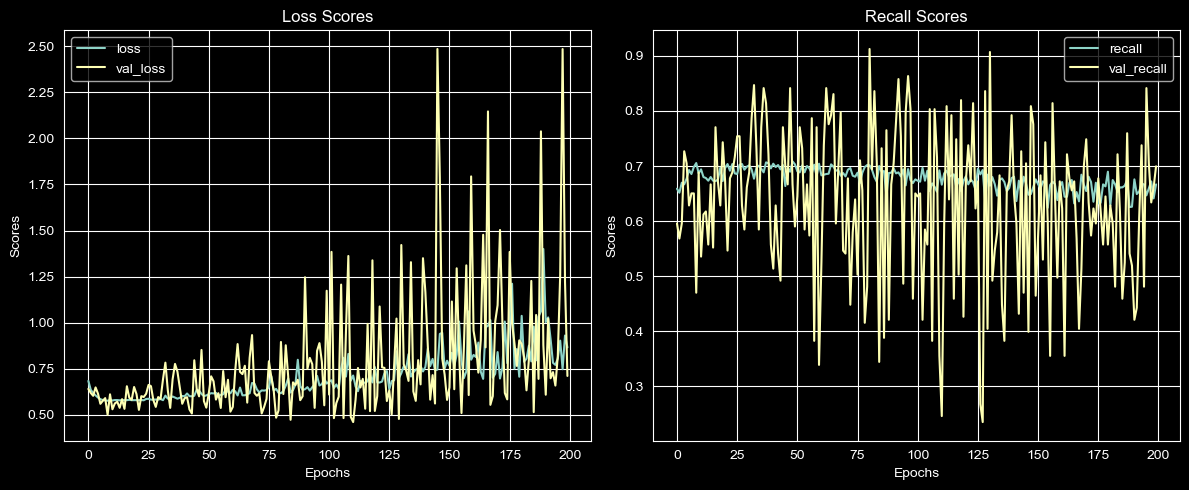

In [255]:
plot_subplotsrecall()

32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

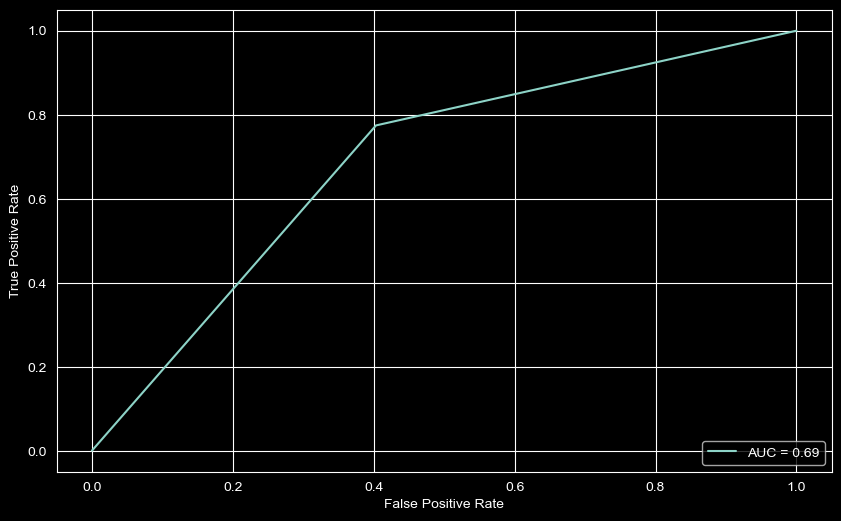

In [256]:
plotRoc()

In [257]:
modelB = keepscores("Weighted")
allframes = [modelA, modelB]

32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [258]:
keepotherscores()

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [259]:
evalreport()

loss:  0.7565799951553345
accuracy:  0.7745097875595093
32/32 [==============================] - 0s 2ms/step
[[475 321]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       796
           1       0.33      0.77      0.46       204

    accuracy                           0.63      1000
   macro avg       0.62      0.69      0.59      1000
weighted avg       0.79      0.63      0.67      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

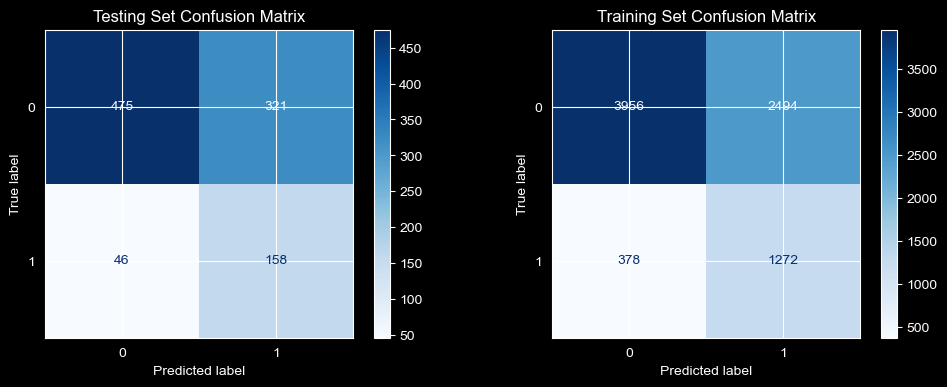

In [260]:
plotconfusion()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [98]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.007), loss="binary_crossentropy", metrics=["Recall"])

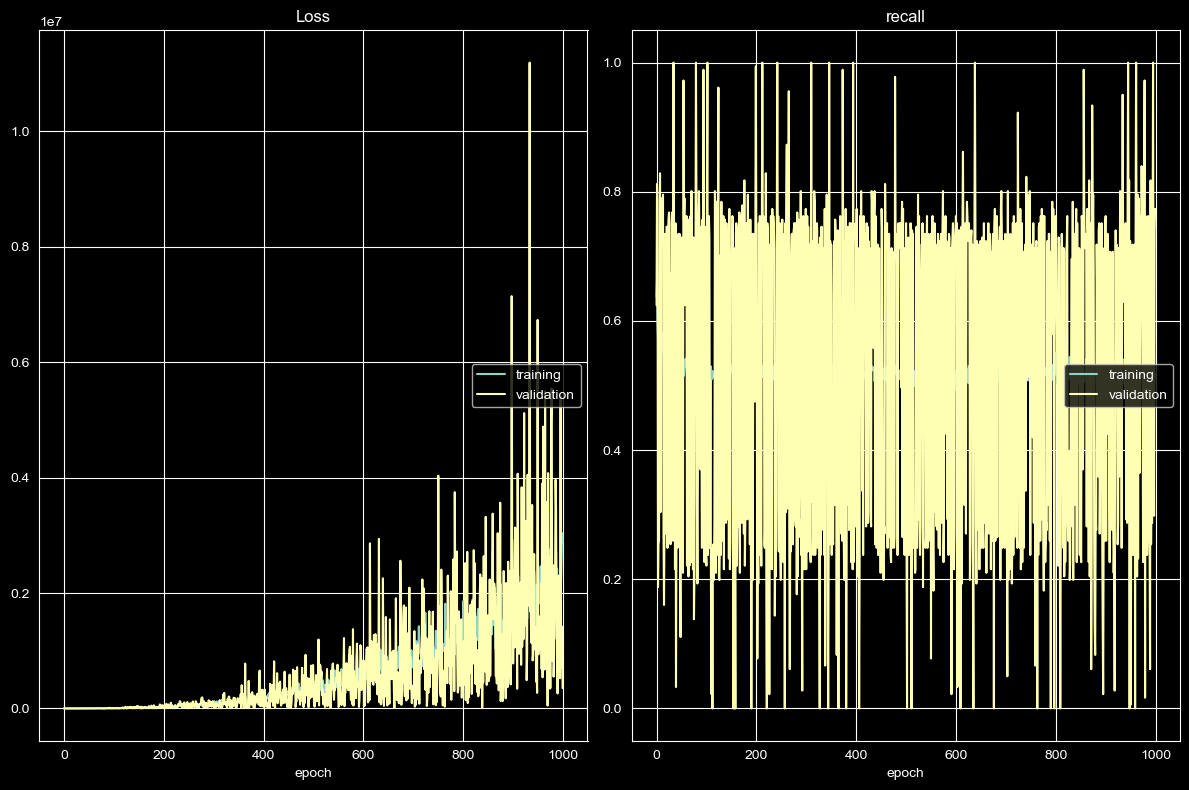

Loss
	training         	 (min:    0.627, max: 3035434.750, cur: 2883294.250)
	validation       	 (min:    0.530, max: 11190356.000, cur: 352434.812)
recall
	training         	 (min:    0.493, max:    0.664, cur:    0.512)
	validation       	 (min:    0.000, max:    1.000, cur:    0.773)
254/254 [==============================] - 3s 11ms/step - loss: 2883294.2500 - recall: 0.5115 - val_loss: 352434.8125 - val_recall: 0.7735


In [99]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                468       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0  0.627   0.637     0.530       0.624
1  0.629   0.664     0.723       0.812
2  1.293   0.597     1.336       0.785
3  3.126   0.573     7.107       0.188
4 11.299   0.542     2.555       0.254

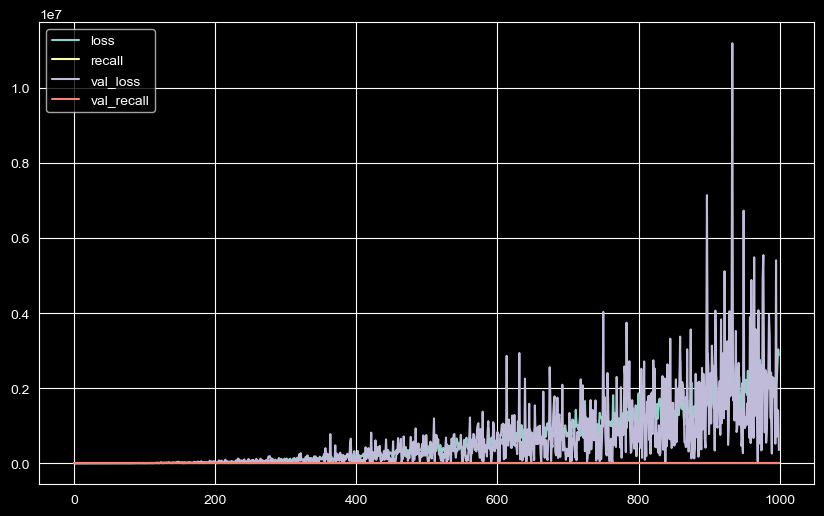

In [102]:
loss_df.plot()
plt.show()

In [103]:
model3 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model3)

In [104]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[201 595]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.82      0.25      0.39       796
           1       0.21      0.78      0.33       204

    accuracy                           0.36      1000
   macro avg       0.51      0.52      0.36      1000
weighted avg       0.69      0.36      0.37      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [105]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [106]:
auc3 = metrics.auc(fpr, tpr)
print(auc3)

0.5159621637599763


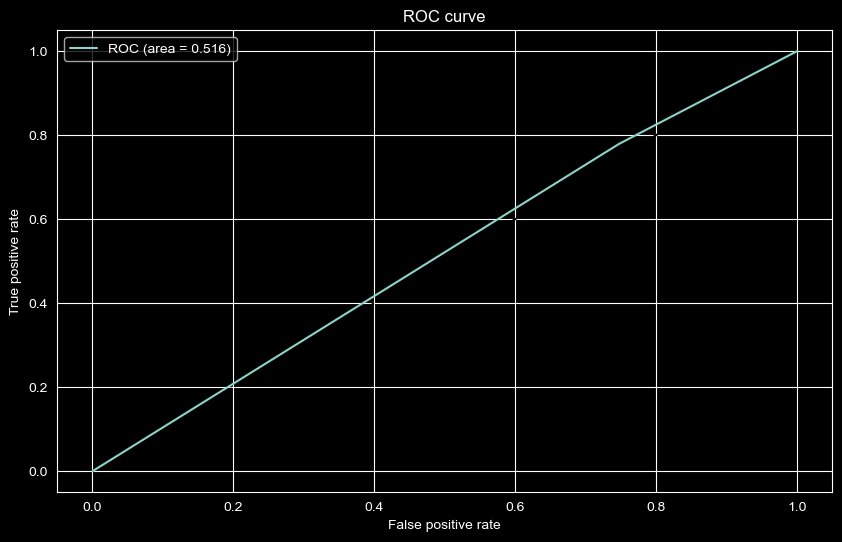

In [107]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation

In [261]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.009), loss="binary_crossentropy", metrics=["Recall"])

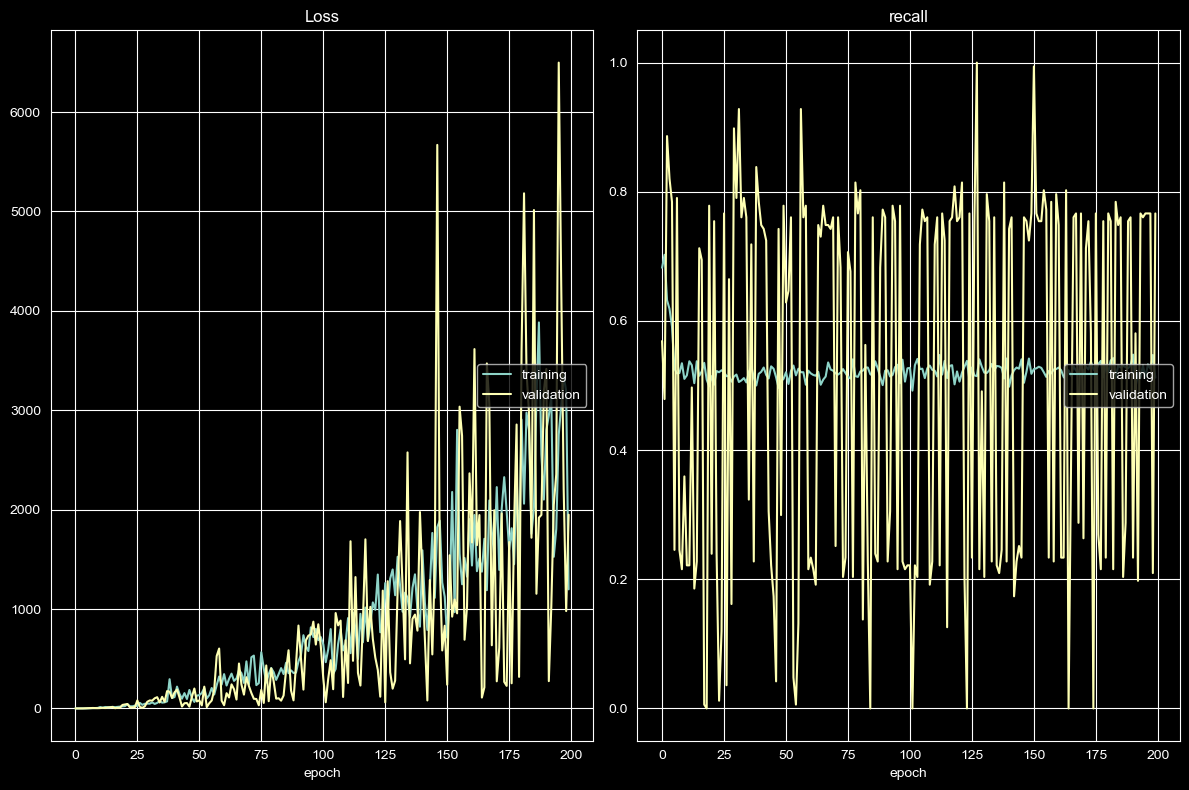

Loss
	training         	 (min:    0.593, max: 3883.662, cur: 1198.532)
	validation       	 (min:    0.498, max: 6497.316, cur: 1949.669)
recall
	training         	 (min:    0.492, max:    0.702, cur:    0.512)
	validation       	 (min:    0.000, max:    1.000, cur:    0.766)
64/64 [==============================] - 1s 13ms/step - loss: 1198.5325 - recall: 0.5121 - val_loss: 1949.6689 - val_recall: 0.7665


In [263]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

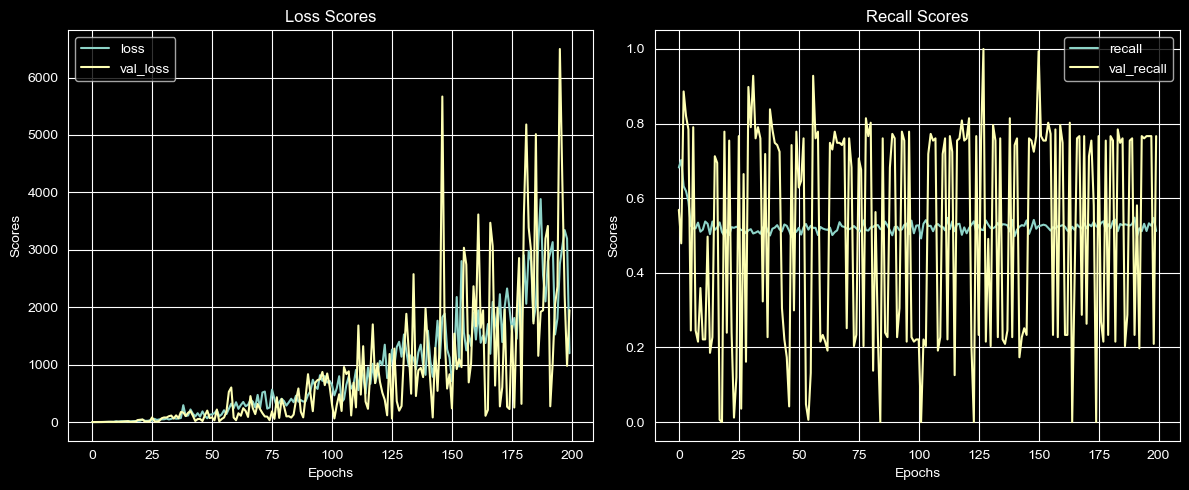

In [264]:
plot_subplotsrecall()

32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

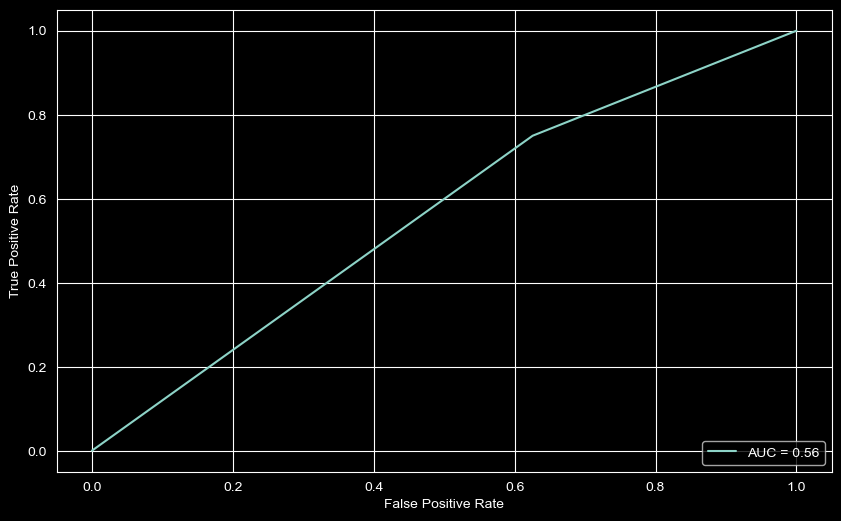

In [265]:
plotRoc()

In [266]:
modelC = keepscores("Inc. Learning Rate")
allframes = [modelA, modelB, modelC]
keepotherscores()

32/32 [==============================] - 0s 3ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [268]:
evalreport()

loss:  2003.8087158203125
accuracy:  0.75
32/32 [==============================] - 0s 2ms/step
[[298 498]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.85      0.37      0.52       796
           1       0.24      0.75      0.36       204

    accuracy                           0.45      1000
   macro avg       0.54      0.56      0.44      1000
weighted avg       0.73      0.45      0.49      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

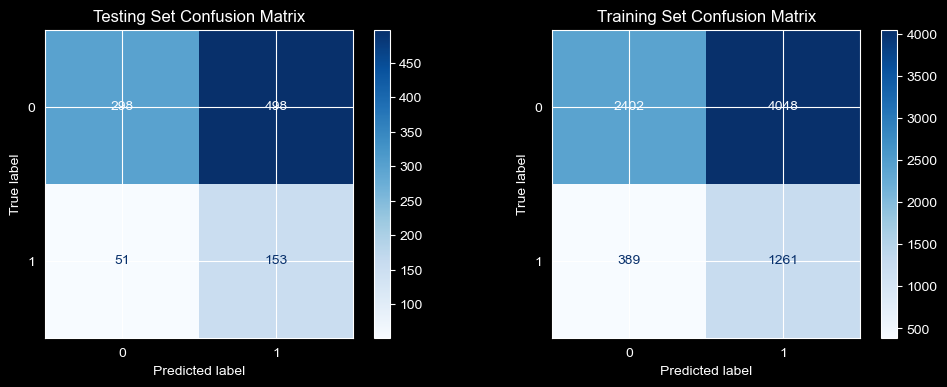

In [269]:
plotconfusion()

### Add Dropout Layer

In [349]:
from keras.layers import Dropout

In [109]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.007)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

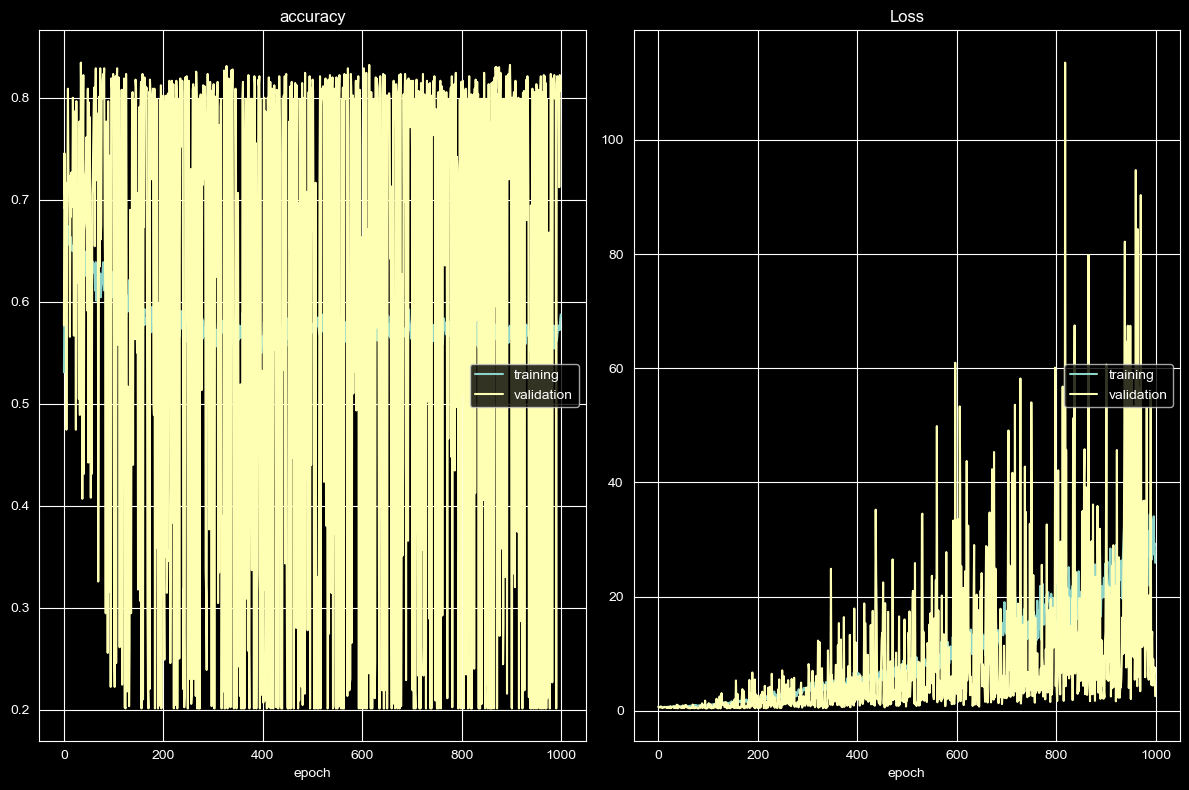

accuracy
	training         	 (min:    0.531, max:    0.674, cur:    0.587)
	validation       	 (min:    0.201, max:    0.834, cur:    0.818)
Loss
	training         	 (min:    0.622, max:   36.030, cur:   25.921)
	validation       	 (min:    0.408, max:  113.556, cur:    2.562)
254/254 [==============================] - 2s 9ms/step - loss: 25.9205 - accuracy: 0.5874 - val_loss: 2.5621 - val_accuracy: 0.8178


In [110]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                468       
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_13 (Dense)            (None, 18)                666       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.759     0.531     0.665         0.577
1 0.665     0.609     0.606         0.746
2 0.645     0.653     0.615         0.691
3 0.640     0.627     0.587         0.717
4 0.632     0.648     0.602         0.703

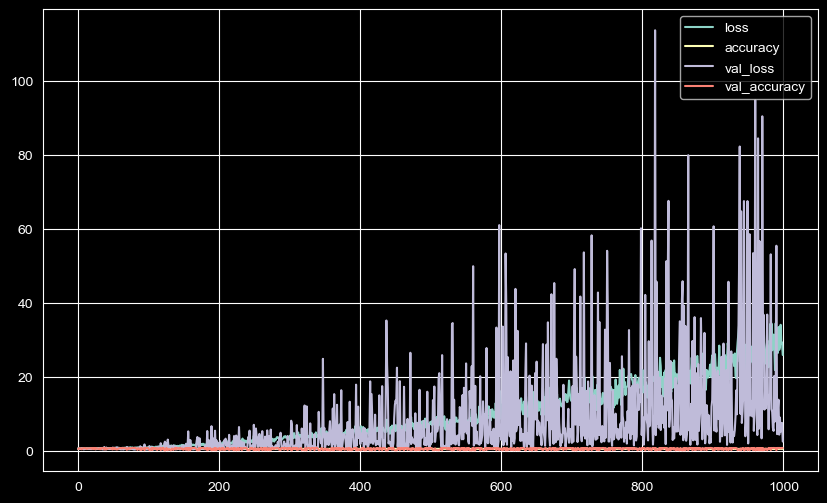

In [113]:
loss_df.plot()
plt.show()

In [114]:
model3 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model3)

In [172]:
loss, accuracy = model3
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  2.791738271713257
accuracy:  0.7960000038146973


In [115]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[726  70]
 [134  70]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       796
           1       0.50      0.34      0.41       204

    accuracy                           0.80      1000
   macro avg       0.67      0.63      0.64      1000
weighted avg       0.77      0.80      0.78      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [116]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [117]:
auc4 = metrics.auc(fpr, tpr)
print(auc4)

0.6275987782047493


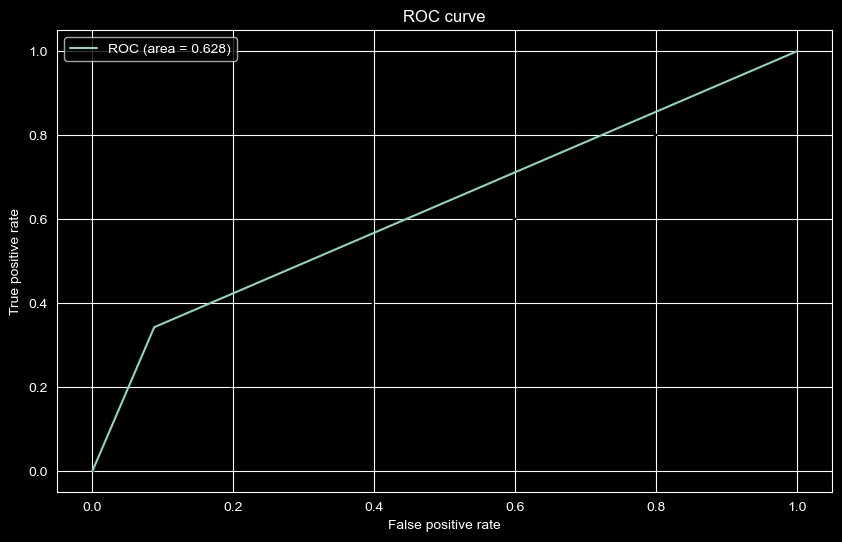

In [118]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc4))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation

In [271]:
from keras.layers import Dropout

In [272]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.009)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

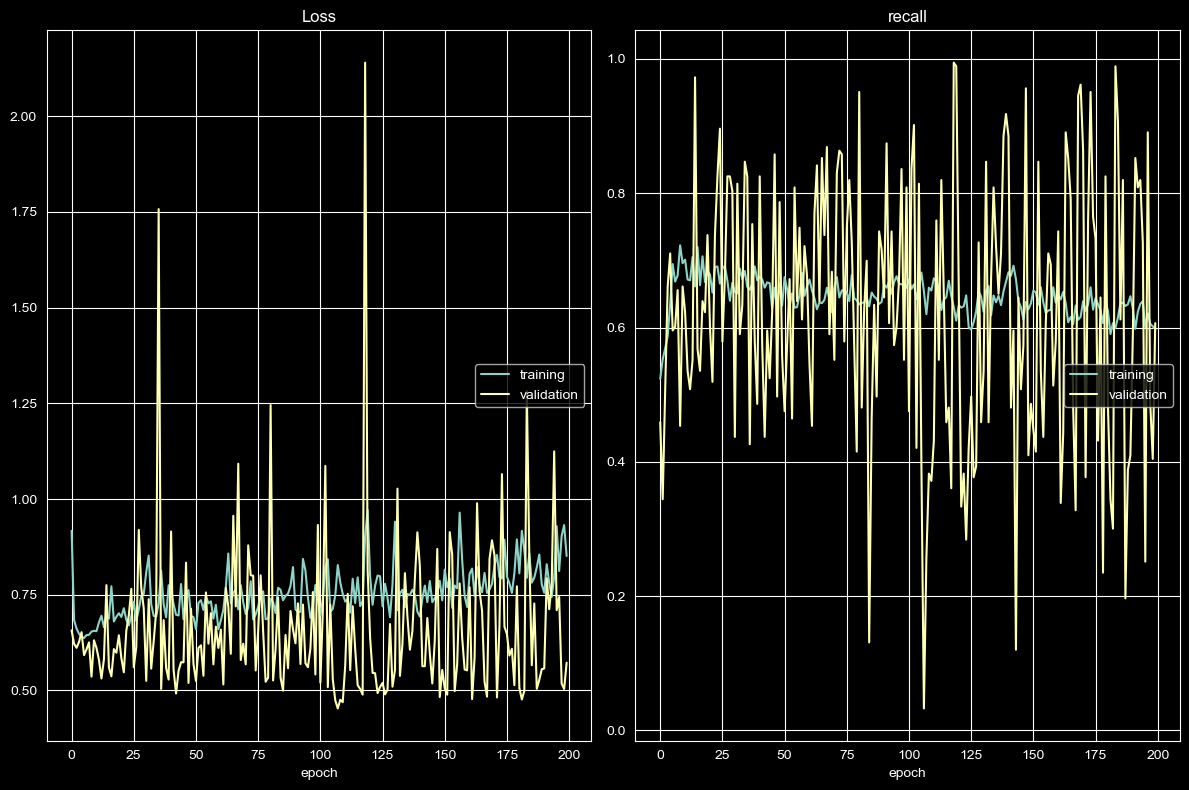

Loss
	training         	 (min:    0.637, max:    0.972, cur:    0.851)
	validation       	 (min:    0.453, max:    2.140, cur:    0.573)
recall
	training         	 (min:    0.524, max:    0.722, cur:    0.598)
	validation       	 (min:    0.033, max:    0.995, cur:    0.607)
64/64 [==============================] - 1s 17ms/step - loss: 0.8513 - recall: 0.5976 - val_loss: 0.5726 - val_recall: 0.6066


In [273]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[PlotLossesKeras()]
)

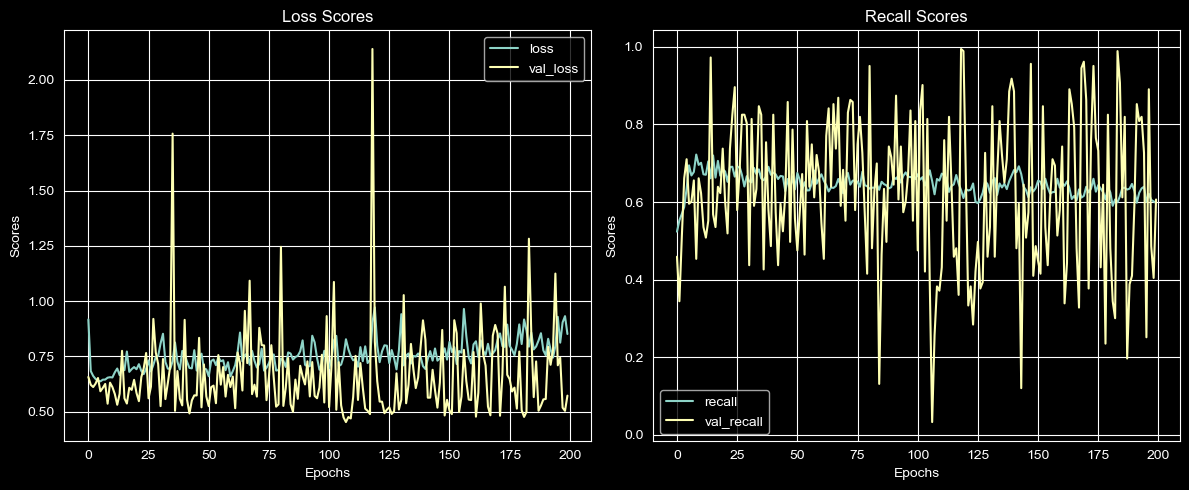

In [274]:
plot_subplotsrecall()

32/32 [==============================] - 0s 5ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

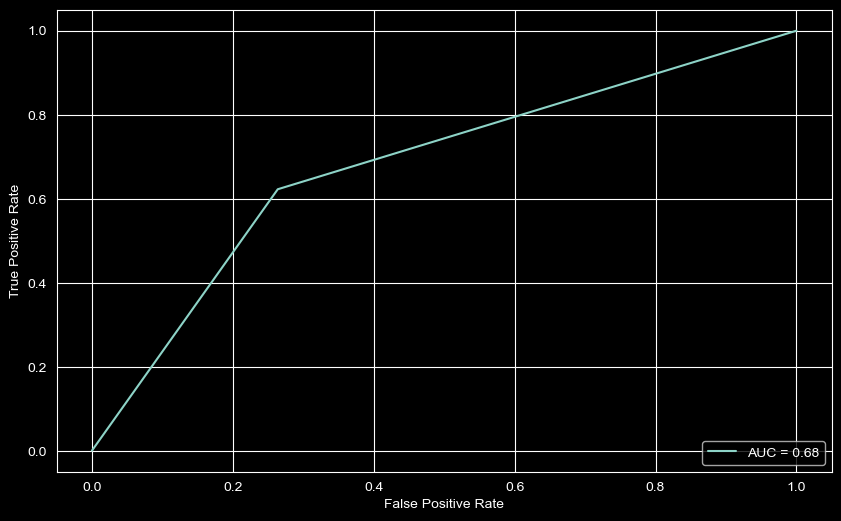

In [275]:
plotRoc()

In [279]:
modelD = keepscores("Dropout")
allframes = [modelA, modelB, modelC, modelD]
keepotherscores()

32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [277]:
evalreport()

loss:  0.5685931444168091
accuracy:  0.6225489974021912
32/32 [==============================] - 0s 2ms/step
[[586 210]
 [ 77 127]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       796
           1       0.38      0.62      0.47       204

    accuracy                           0.71      1000
   macro avg       0.63      0.68      0.64      1000
weighted avg       0.78      0.71      0.74      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

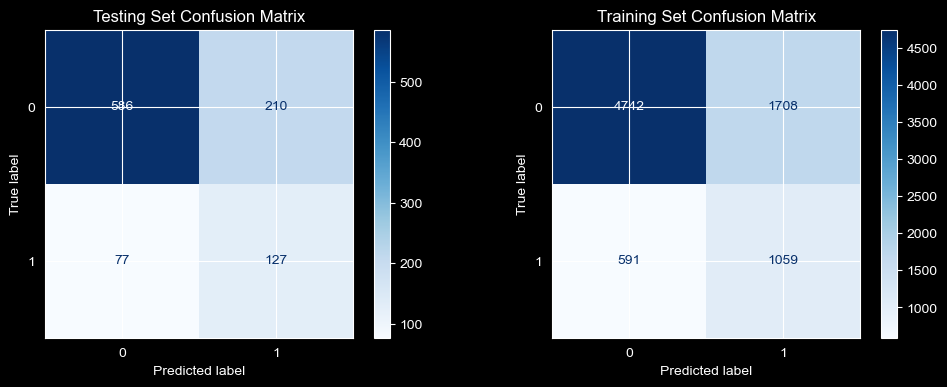

In [278]:
plotconfusion()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [119]:
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.007), loss="binary_crossentropy", metrics=["Recall"])

In [120]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

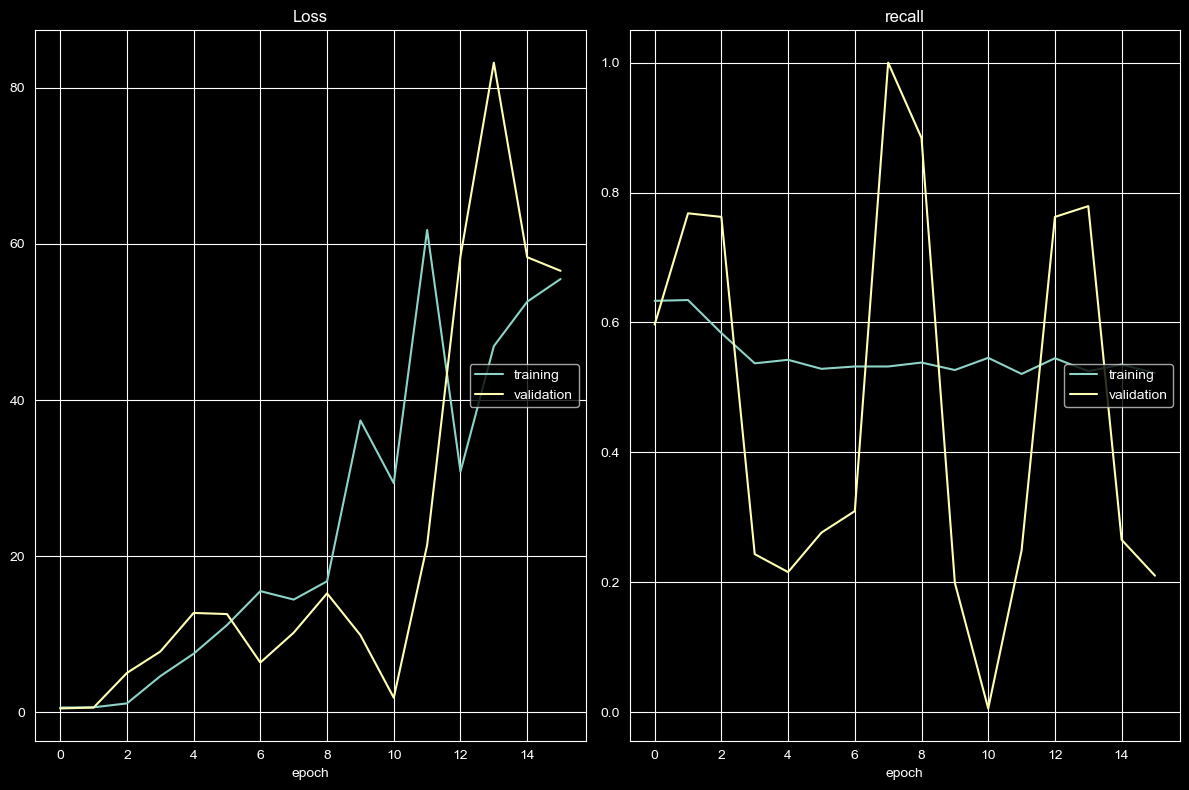

Loss
	training         	 (min:    0.625, max:   61.789, cur:   55.507)
	validation       	 (min:    0.512, max:   83.222, cur:   56.559)
recall
	training         	 (min:    0.521, max:    0.634, cur:    0.522)
	validation       	 (min:    0.006, max:    1.000, cur:    0.210)
254/254 [==============================] - 2s 9ms/step - loss: 55.5070 - recall: 0.5218 - val_loss: 56.5595 - val_recall: 0.2099
Epoch 16: early stopping


In [121]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                468       
                                                                 
 dense_17 (Dense)            (None, 18)                666       
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dense_19 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.625   0.633     0.512       0.597
1 0.652   0.634     0.623       0.768
2 1.159   0.584     5.061       0.762
3 4.647   0.537     7.795       0.243
4 7.521   0.542    12.743       0.215

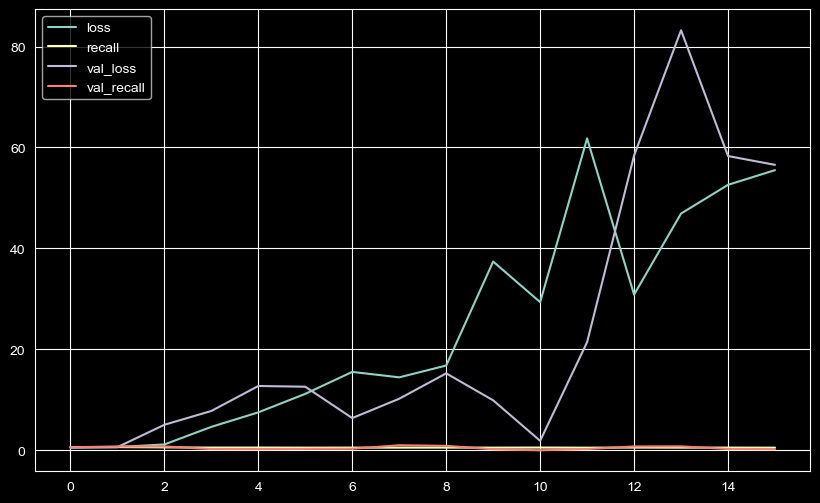

In [124]:
loss_df.plot()
plt.show()

In [125]:
model4 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model4)

In [171]:
loss, accuracy = model4
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5481835603713989
accuracy:  0.5343137383460999


In [126]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[613 183]
 [ 95 109]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       796
           1       0.37      0.53      0.44       204

    accuracy                           0.72      1000
   macro avg       0.62      0.65      0.63      1000
weighted avg       0.77      0.72      0.74      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [127]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [128]:
auc5 = metrics.auc(fpr, tpr)
print(auc5)

0.6522071140013793


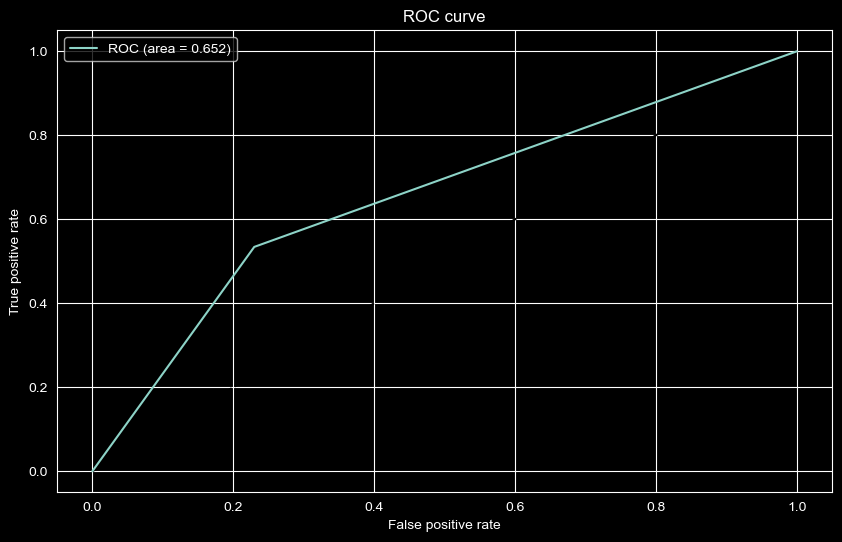

In [129]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation

In [284]:
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.009), loss="binary_crossentropy", metrics=["Recall"])

In [285]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True
)

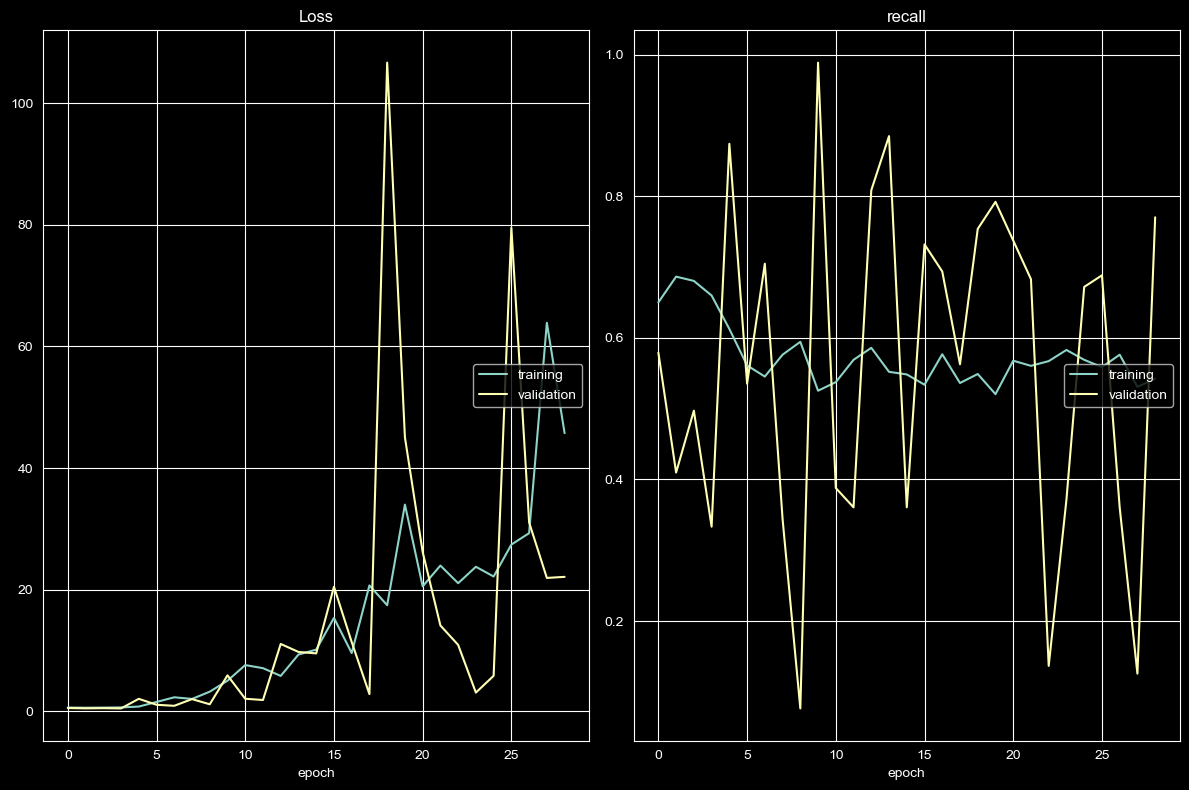

Loss
	training         	 (min:    0.591, max:   63.873, cur:   45.736)
	validation       	 (min:    0.475, max:  106.654, cur:   22.110)
recall
	training         	 (min:    0.521, max:    0.687, cur:    0.542)
	validation       	 (min:    0.077, max:    0.989, cur:    0.770)
64/64 [==============================] - 1s 13ms/step - loss: 45.7362 - recall: 0.5424 - val_loss: 22.1101 - val_recall: 0.7705
Epoch 29: early stopping


In [286]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

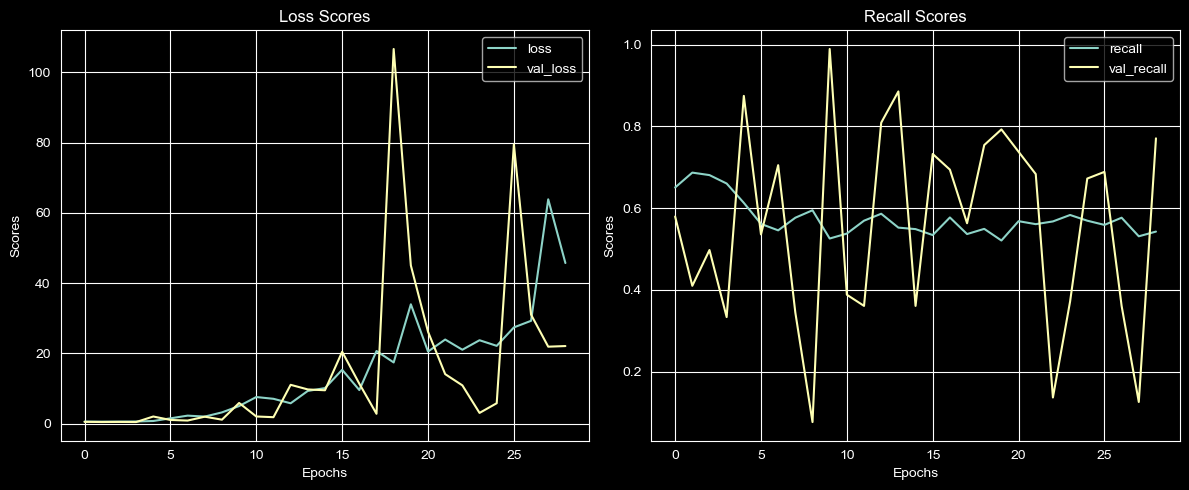

In [287]:
plot_subplotsrecall()

32/32 [==============================] - 0s 3ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

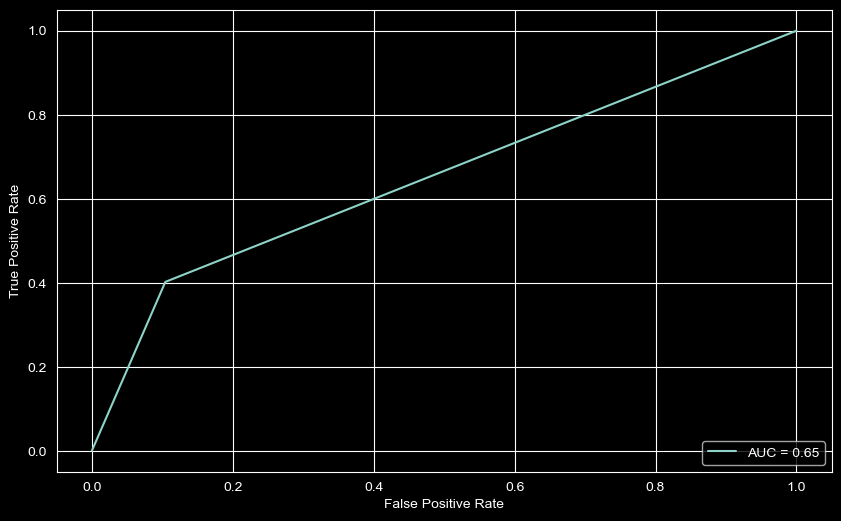

In [288]:
plotRoc()

In [290]:
modelE = keepscores("Early Stopping (val_loss)")
allframes = [modelA, modelB, modelC, modelD, modelE]
keepotherscores()


32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [296]:
evalreport()

loss:  0.47116103768348694
accuracy:  0.4019607901573181
32/32 [==============================] - 0s 2ms/step
[[713  83]
 [122  82]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       796
           1       0.50      0.40      0.44       204

    accuracy                           0.80      1000
   macro avg       0.68      0.65      0.66      1000
weighted avg       0.78      0.80      0.79      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

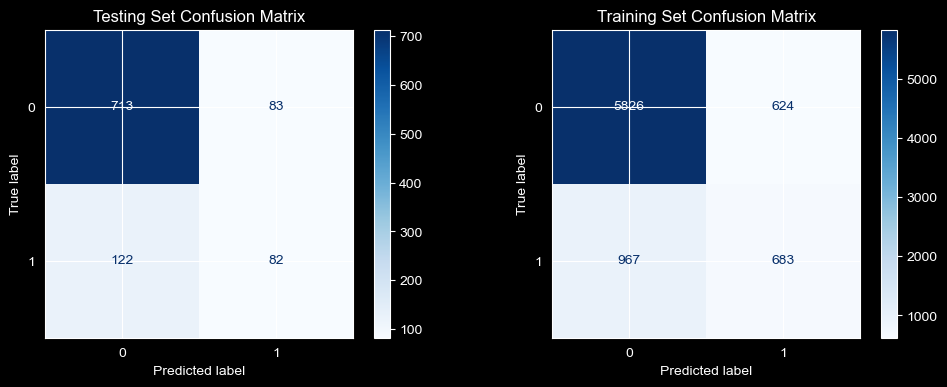

In [297]:
plotconfusion()

#### Monitor the "val_recall" as metric

In [298]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.007), loss="binary_crossentropy", metrics=["Recall"])

In [299]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

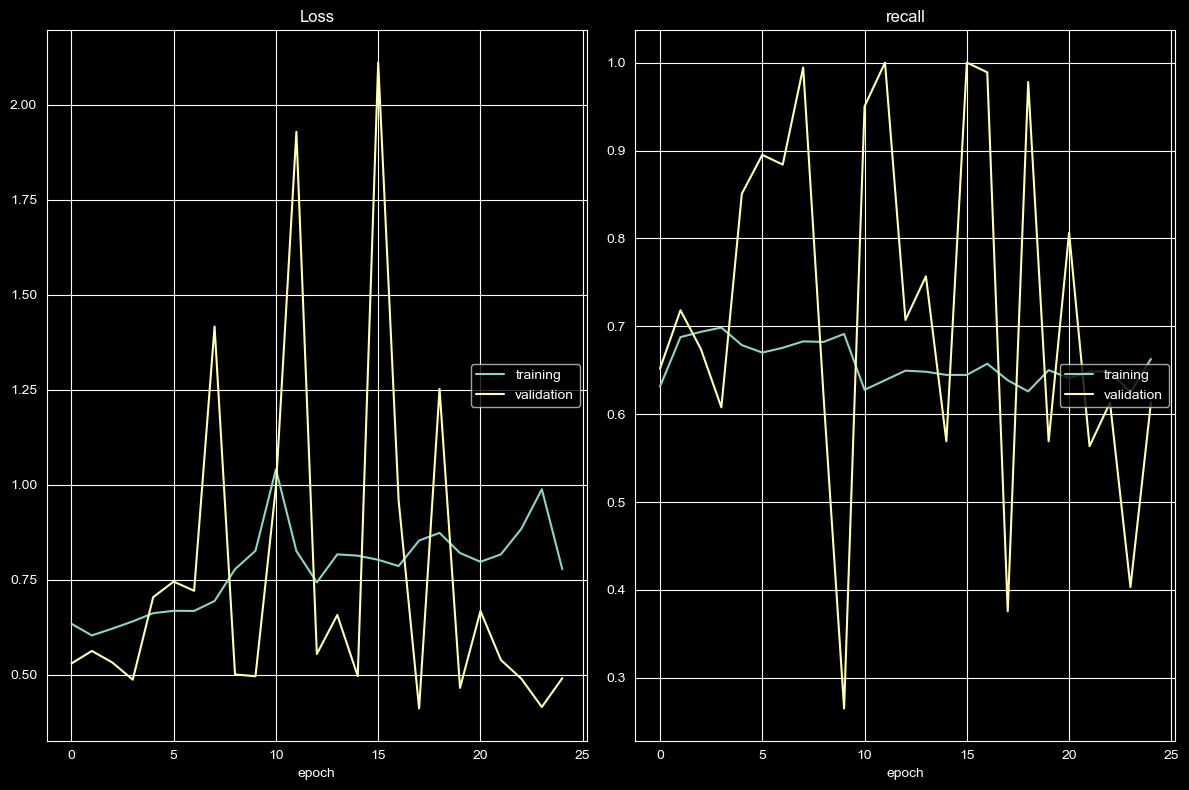

Loss
	training         	 (min:    0.603, max:    1.041, cur:    0.778)
	validation       	 (min:    0.411, max:    2.110, cur:    0.491)
recall
	training         	 (min:    0.625, max:    0.699, cur:    0.663)
	validation       	 (min:    0.265, max:    1.000, cur:    0.613)
254/254 [==============================] - 2s 9ms/step - loss: 0.7776 - recall: 0.6628 - val_loss: 0.4908 - val_recall: 0.6133
Epoch 25: early stopping


In [132]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

In [133]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 36)                468       
                                                                 
 dense_21 (Dense)            (None, 18)                666       
                                                                 
 dense_22 (Dense)            (None, 9)                 171       
                                                                 
 dense_23 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.634   0.631     0.529       0.652
1 0.603   0.688     0.562       0.718
2 0.621   0.694     0.532       0.674
3 0.640   0.699     0.487       0.608
4 0.662   0.679     0.704       0.851

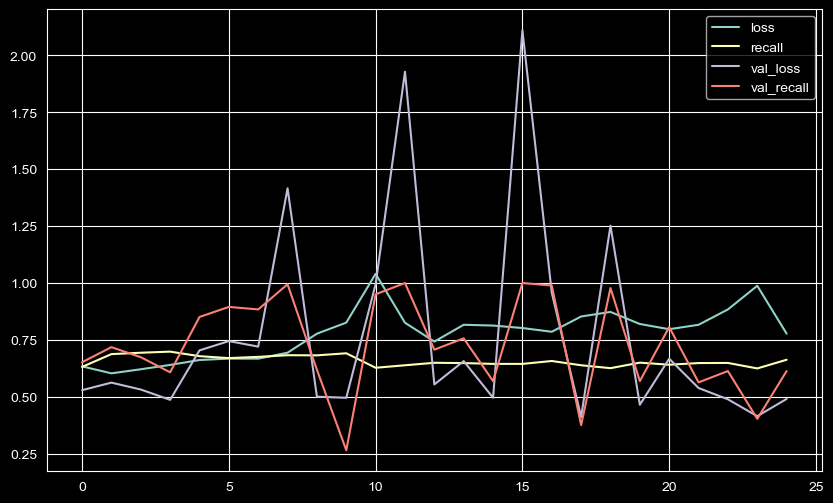

In [135]:
loss_df.plot()
plt.show()

In [136]:
model5 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model5)

In [170]:
loss, accuracy = model5
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5571701526641846
accuracy:  0.20588235557079315


In [137]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[784  12]
 [162  42]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       796
           1       0.78      0.21      0.33       204

    accuracy                           0.83      1000
   macro avg       0.80      0.60      0.61      1000
weighted avg       0.82      0.83      0.78      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [138]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [139]:
auc6 = metrics.auc(fpr, tpr)
print(auc6)

0.5954034880283772


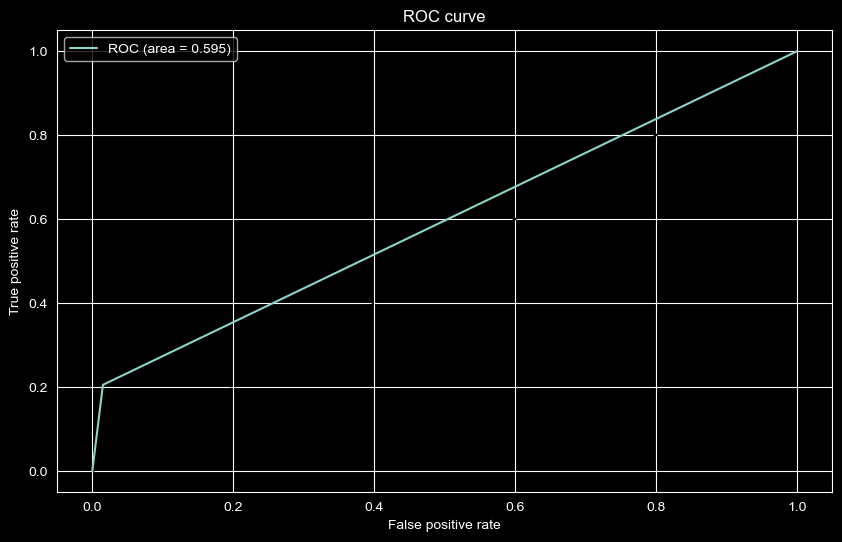

In [141]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc6))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## With Validation

In [310]:
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["Recall"])

In [311]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=25, restore_best_weights=True
)

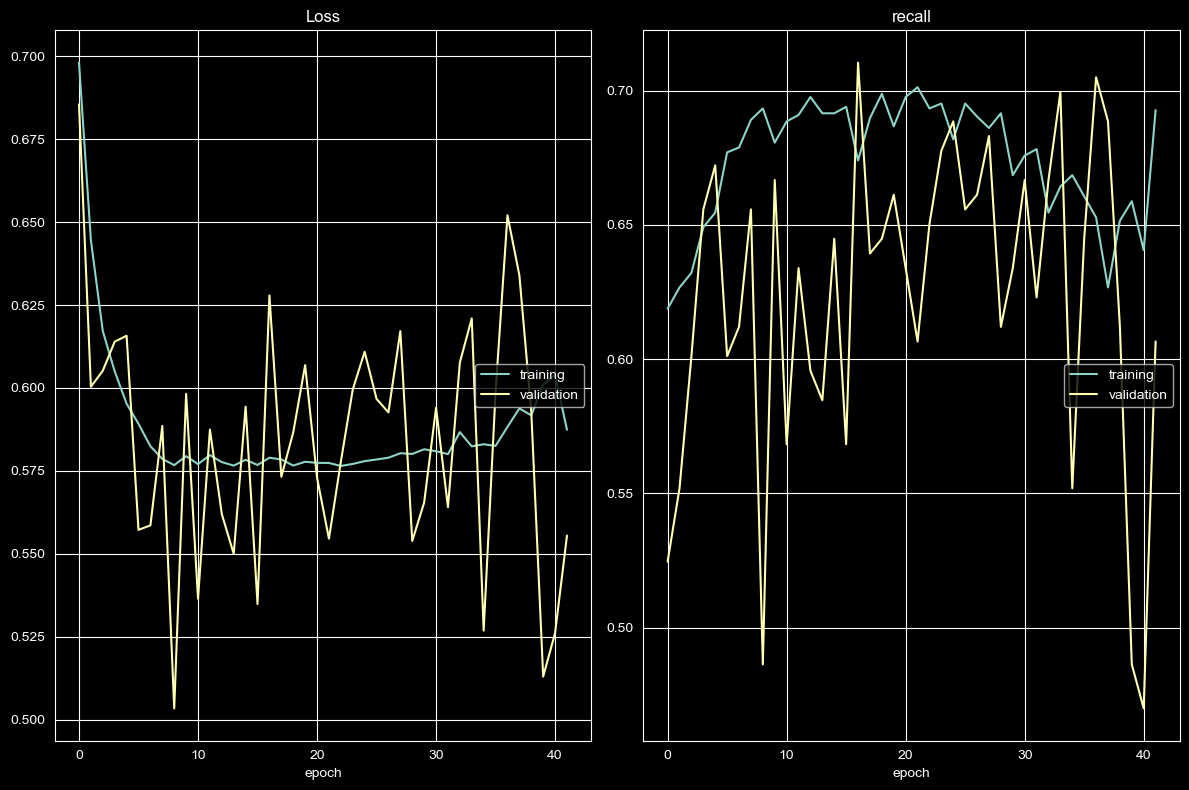

Loss
	training         	 (min:    0.576, max:    0.698, cur:    0.587)
	validation       	 (min:    0.503, max:    0.686, cur:    0.555)
recall
	training         	 (min:    0.619, max:    0.701, cur:    0.693)
	validation       	 (min:    0.470, max:    0.710, cur:    0.607)
64/64 [==============================] - 1s 15ms/step - loss: 0.5874 - recall: 0.6927 - val_loss: 0.5555 - val_recall: 0.6066
Epoch 42: early stopping


In [312]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

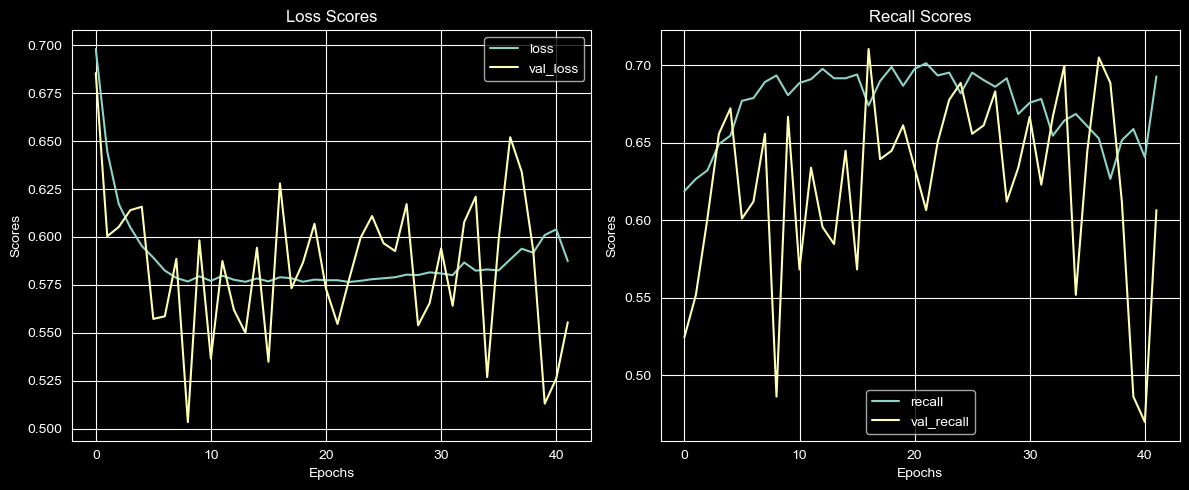

In [313]:
plot_subplotsrecall()

32/32 [==============================] - 1s 9ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

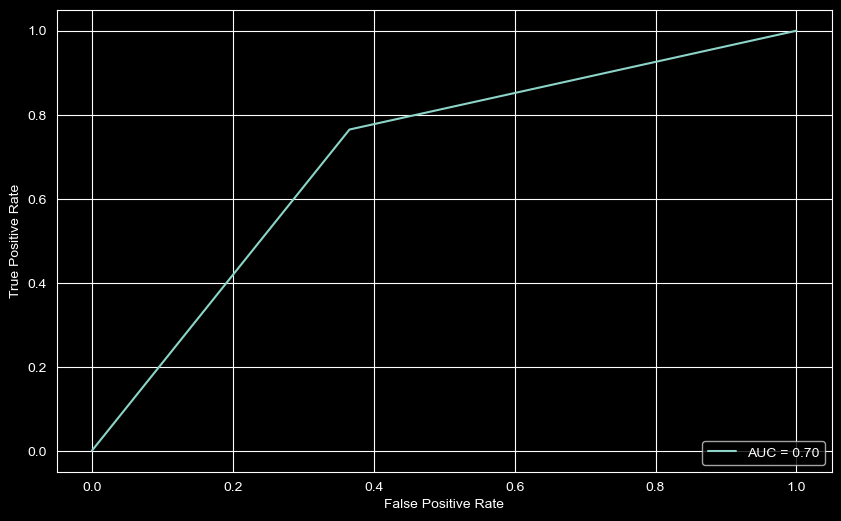

In [314]:
plotRoc()

In [315]:
modelF = keepscores("Early Stopping (val_loss)")
allframes = [modelA, modelB, modelC, modelD, modelE, modelF]
keepotherscores()


32/32 [==============================] - 0s 3ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [316]:
evalreport()

loss:  0.6413500905036926
accuracy:  0.7647058963775635
32/32 [==============================] - 0s 1ms/step
[[505 291]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75       796
           1       0.35      0.76      0.48       204

    accuracy                           0.66      1000
   macro avg       0.63      0.70      0.61      1000
weighted avg       0.80      0.66      0.69      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

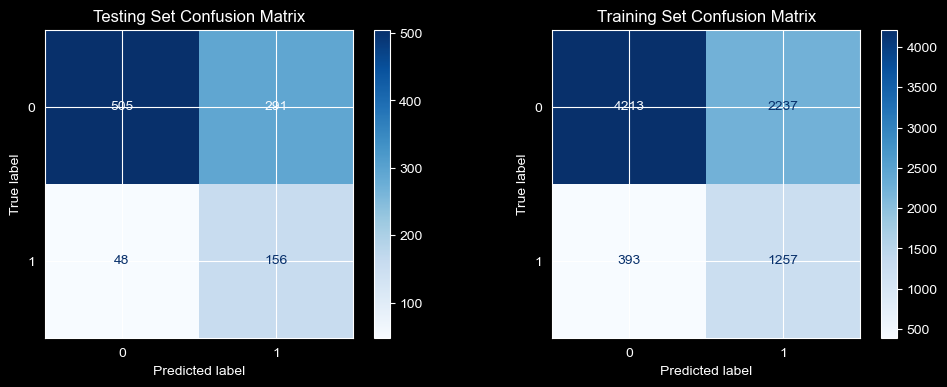

In [317]:
plotconfusion()

### Focusing on Accuracy

In [142]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.007), loss="binary_crossentropy", metrics=["Accuracy"])

In [143]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="min", verbose=1, patience=15, restore_best_weights=True
)

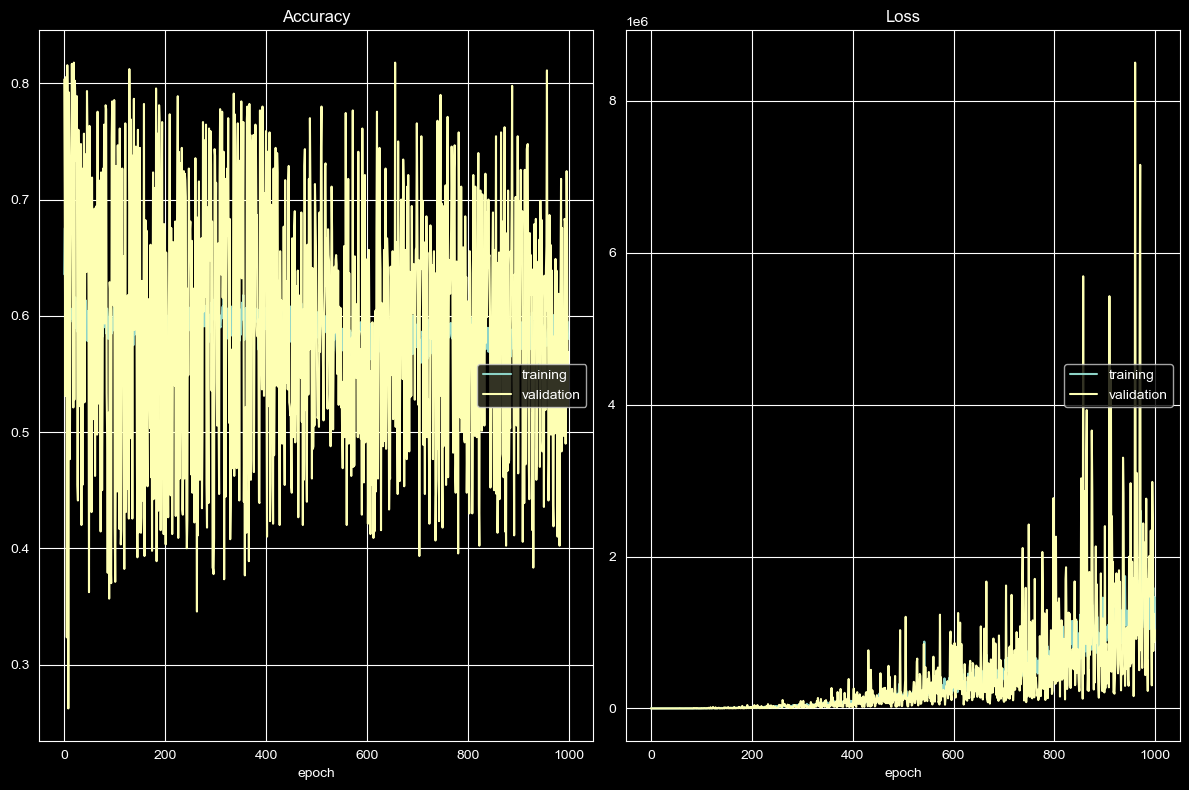

Accuracy
	training         	 (min:    0.551, max:    0.677, cur:    0.580)
	validation       	 (min:    0.262, max:    0.818, cur:    0.569)
Loss
	training         	 (min:    0.607, max: 2602458.000, cur: 1462702.625)
	validation       	 (min:    0.458, max: 8502738.000, cur: 1030911.188)
254/254 [==============================] - 2s 10ms/step - loss: 1462702.6250 - Accuracy: 0.5800 - val_loss: 1030911.1875 - val_Accuracy: 0.5689


In [144]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

In [145]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  Accuracy  val_loss  val_Accuracy
0 0.627     0.636     0.471         0.803
1 0.607     0.675     0.592         0.699
2 0.610     0.677     0.743         0.531
3 0.615     0.673     0.581         0.713
4 0.679     0.647     0.458         0.806

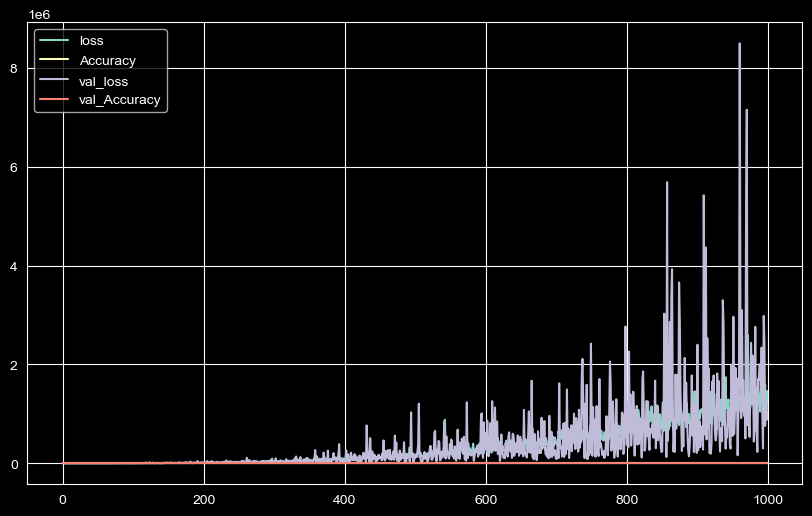

In [146]:
loss_df.plot()
plt.show()

In [147]:
model6 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model6)

In [168]:
loss, accuracy = model6
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  1136797.125
accuracy:  0.5509999990463257


In [148]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[403 393]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.88      0.51      0.64       796
           1       0.27      0.73      0.40       204

    accuracy                           0.55      1000
   macro avg       0.58      0.62      0.52      1000
weighted avg       0.75      0.55      0.59      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [149]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [150]:
auc7 = metrics.auc(fpr, tpr)
print(auc7)

0.6158858015568036


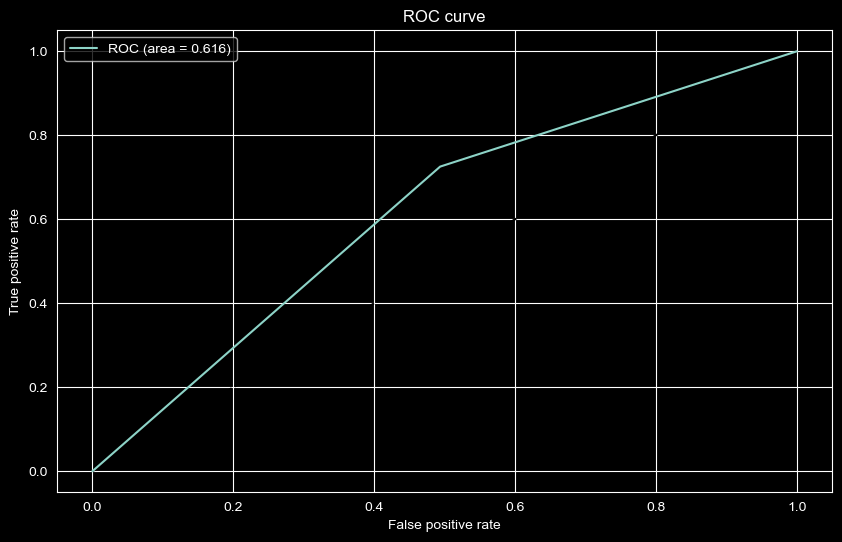

In [151]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc7))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Optuna

In [324]:
import optuna
from keras.optimizers.legacy import Adam, Adadelta, RMSprop, Nadam

In [325]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=25, restore_best_weights=True
)

In [326]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 18, 32) # Can be in a bigger range like 4, 128
    n_units2 = trial.suggest_int("n_units2", 8, 14) # Can be 2, 64
    n_units3 = trial.suggest_int("n_units3", 2, 6) # 2, 32
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 0.009)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 3)
    w1 = trial.suggest_loguniform("w1", 0.01, 4)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop, PlotLossesKeras()],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

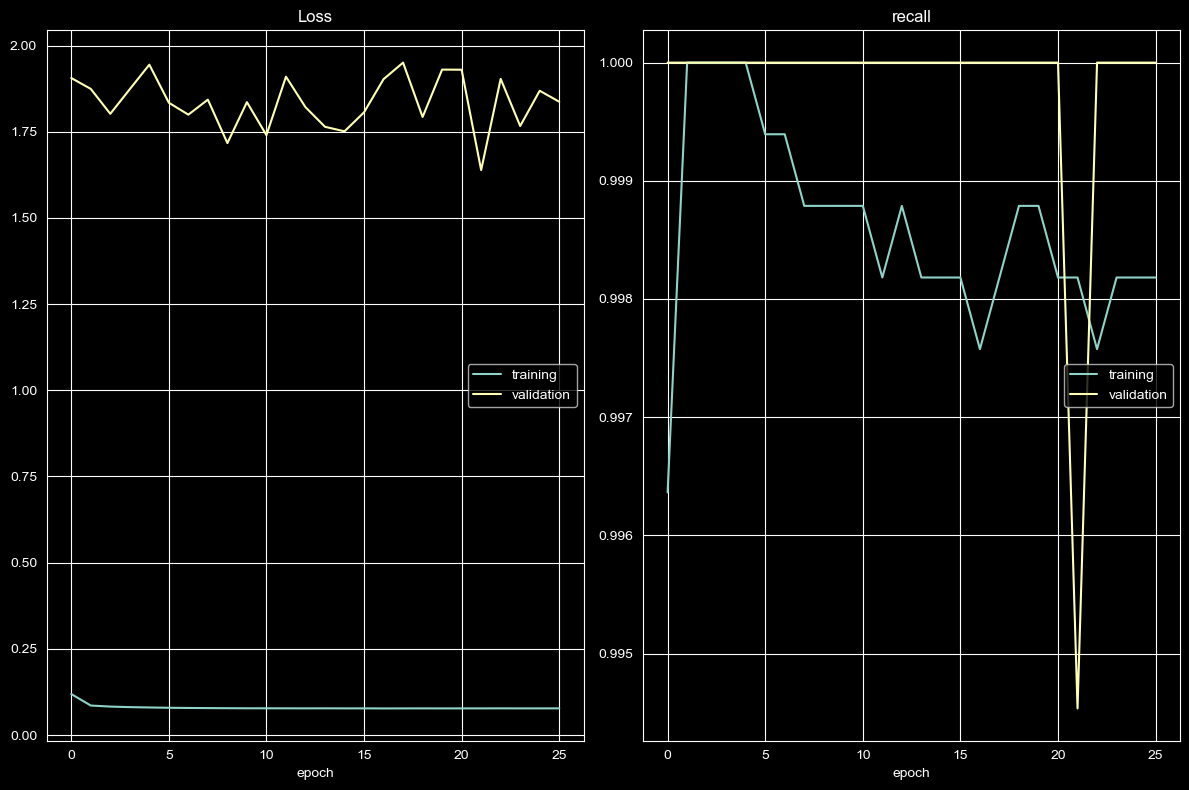

Loss
	training         	 (min:    0.077, max:    0.119, cur:    0.077)
	validation       	 (min:    1.639, max:    1.951, cur:    1.837)
recall
	training         	 (min:    0.996, max:    1.000, cur:    0.998)
	validation       	 (min:    0.995, max:    1.000, cur:    1.000)
Epoch 26: early stopping


[I 2023-10-30 21:55:43,452] Trial 19 finished with value: 1.0 and parameters: {'n_units1': 28, 'n_units2': 13, 'n_units3': 4, 'optimizer': <class 'keras.src.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.0004909732051003707, 'w0': 0.030076545971901097, 'w1': 1.6781691532115917}. Best is trial 6 with value: 1.0.


{'n_units1': 21,
 'n_units2': 12,
 'n_units3': 2,
 'optimizer': keras.src.optimizers.legacy.nadam.Nadam,
 'learning_rate': 0.0019241141669767154,
 'w0': 0.06779318743347883,
 'w1': 3.4934299754540326}

In [327]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

## Best Parameters:
    {'n_units1': 21,
    'n_units2': 12,
    'n_units3': 2,
    'optimizer': keras.src.optimizers.legacy.nadam.Nadam,
    'learning_rate': 0.0019241141669767154,
    'w0': 0.06779318743347883,
    'w1': 3.4934299754540326}

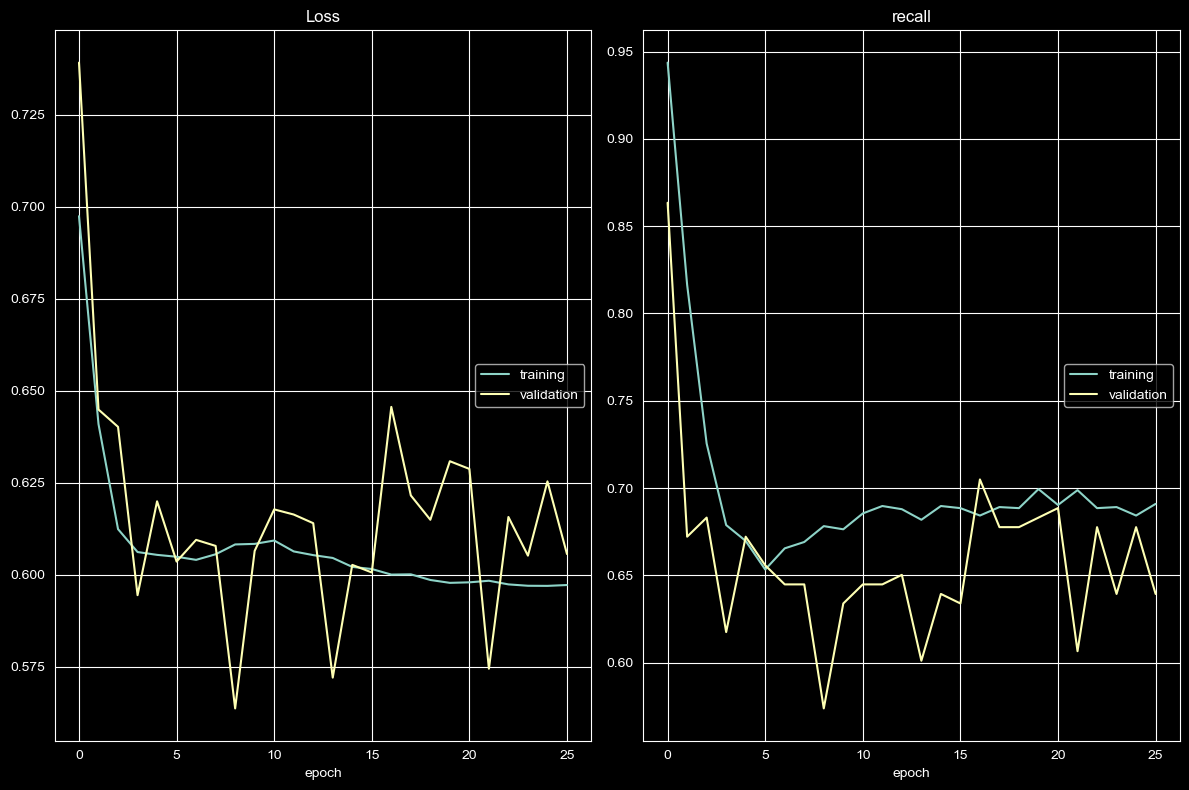

Loss
	training         	 (min:    0.597, max:    0.697, cur:    0.597)
	validation       	 (min:    0.564, max:    0.739, cur:    0.606)
recall
	training         	 (min:    0.653, max:    0.944, cur:    0.691)
	validation       	 (min:    0.574, max:    0.863, cur:    0.639)
127/127 [==============================] - 2s 19ms/step - loss: 0.5971 - recall: 0.6909 - val_loss: 0.6056 - val_recall: 0.6393
Epoch 26: early stopping


In [337]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=100,
    class_weight=class_weights,
    callbacks=[early_stop, PlotLossesKeras()],
    verbose=1,
)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

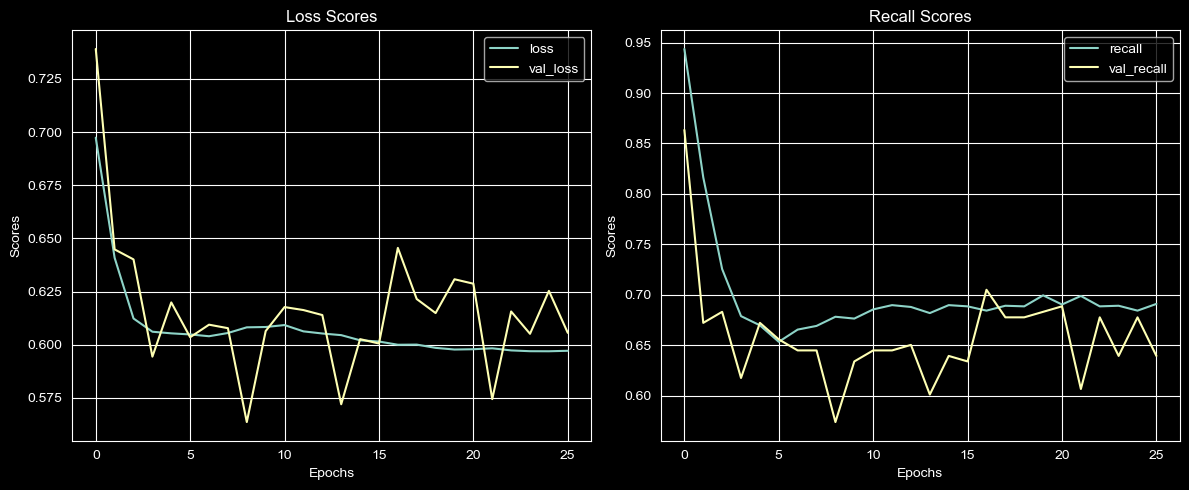

In [338]:
plot_subplotsrecall()

32/32 [==============================] - 0s 5ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

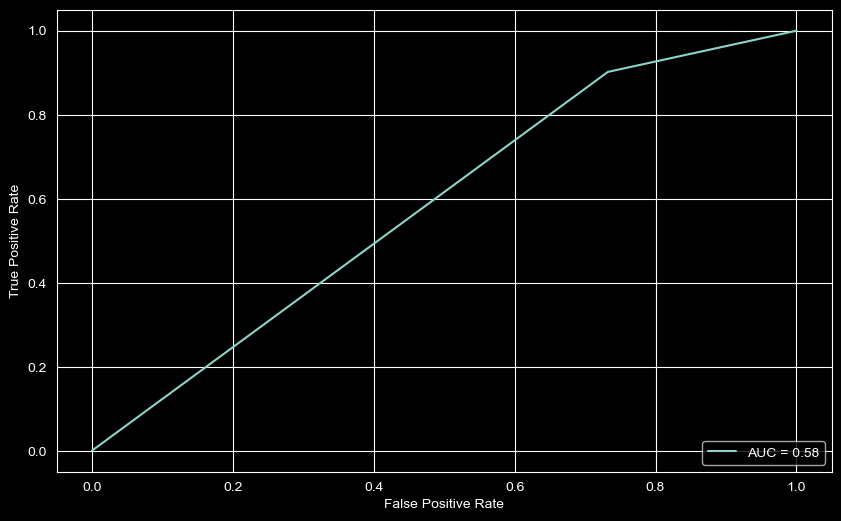

In [339]:
plotRoc()

In [341]:
modelG = keepscores("Optuna")
allframes = [modelA, modelB, modelC, modelD, modelE, modelF, modelG]
keepotherscores()

32/32 [==============================] - 0s 4ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [340]:
evalreport()

loss:  0.7432616949081421
accuracy:  0.9019607901573181
32/32 [==============================] - 0s 3ms/step
[[213 583]
 [ 20 184]]
              precision    recall  f1-score   support

           0       0.91      0.27      0.41       796
           1       0.24      0.90      0.38       204

    accuracy                           0.40      1000
   macro avg       0.58      0.58      0.40      1000
weighted avg       0.78      0.40      0.41      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

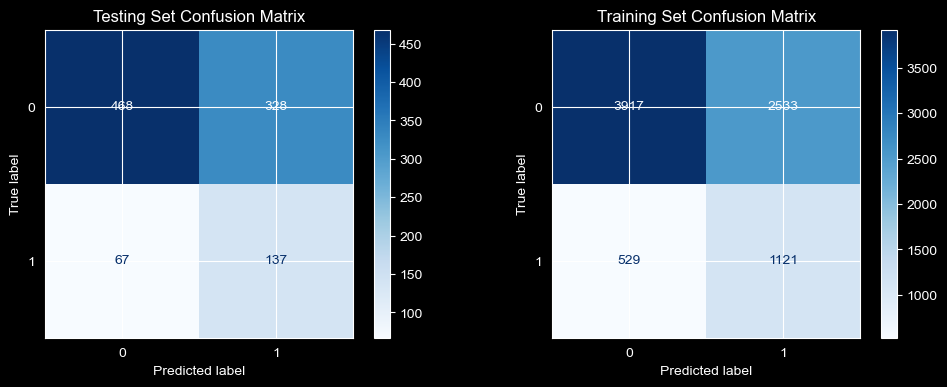

In [336]:
plotconfusion()

## Model Evaluation Overview

In [342]:
allmodels = pd.concat(allframes)
allmodels

Model           Class  precision  recall  f1-score  \
0                    Vanilla  Not Exited (0)      0.796   1.000     0.886   
0                    Vanilla      Exited (1)      0.000   0.000     0.000   
0                   Weighted  Not Exited (0)      0.912   0.597     0.721   
0                   Weighted      Exited (1)      0.330   0.775     0.463   
0         Inc. Learning Rate  Not Exited (0)      0.854   0.374     0.521   
0         Inc. Learning Rate      Exited (1)      0.235   0.750     0.358   
0                    Dropout  Not Exited (0)      0.884   0.736     0.803   
0                    Dropout      Exited (1)      0.377   0.623     0.470   
0  Early Stopping (val_loss)  Not Exited (0)      0.854   0.896     0.874   
0  Early Stopping (val_loss)      Exited (1)      0.497   0.402     0.444   
0  Early Stopping (val_loss)  Not Exited (0)      0.913   0.634     0.749   
0  Early Stopping (val_loss)      Exited (1)      0.349   0.765     0.479   
0                     Optuna  Not Exited (0)      0.914   0.268     0.414   
0                     Optuna      Exited (1)      0.240   0.902     0.379   

   support  
0      796  
0      204  
0      796  
0      204  
0      796  
0      204  
0      796  
0      204  
0      796  
0      204  
0      796  
0      204  
0      796  
0      204

In [358]:
allmodelss = pd.read_csv("modelevals.csv")
allmodelevals = allmodelss.drop(columns='Unnamed: 0')

# Best model seems to be Early Stopping with val_recall, we will be using it as the final model (Final Attempt)

In [359]:
allmodelevals

Model           Class  precision  recall  f1-score  \
0                       Vanilla  Not Exited (0)      0.796   1.000     0.886   
1                       Vanilla      Exited (1)      0.000   0.000     0.000   
2                      Weighted  Not Exited (0)      0.912   0.597     0.721   
3                      Weighted      Exited (1)      0.330   0.775     0.463   
4            Inc. Learning Rate  Not Exited (0)      0.854   0.374     0.521   
5            Inc. Learning Rate      Exited (1)      0.235   0.750     0.358   
6                       Dropout  Not Exited (0)      0.884   0.736     0.803   
7                       Dropout      Exited (1)      0.377   0.623     0.470   
8     Early Stopping (val_loss)  Not Exited (0)      0.854   0.896     0.874   
9     Early Stopping (val_loss)      Exited (1)      0.497   0.402     0.444   
10  Early Stopping (val_recall)  Not Exited (0)      0.913   0.634     0.749   
11  Early Stopping (val_recall)      Exited (1)      0.349   0.765     0.479   
12                       Optuna  Not Exited (0)      0.914   0.268     0.414   
13                       Optuna      Exited (1)      0.240   0.902     0.379   

    support  
0       796  
1       204  
2       796  
3       204  
4       796  
5       204  
6       796  
7       204  
8       796  
9       204  
10      796  
11      204  
12      796  
13      204

# Previous Attempt at selecting best model (prior to creating validation set) (disregard this attempt)

In [162]:
model7 = model.evaluate(X_test, y_test, verbose=0)
scores.append(model7)

In [167]:
loss, accuracy = model7
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.611051619052887
accuracy:  0.0833333358168602


In [163]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[695 101]
 [187  17]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       796
           1       0.14      0.08      0.11       204

    accuracy                           0.71      1000
   macro avg       0.47      0.48      0.47      1000
weighted avg       0.66      0.71      0.68      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [164]:
# Get false positive, true positive rates & using ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [165]:
auc8 = metrics.auc(fpr, tpr)
print(auc8)

0.47822445561139026


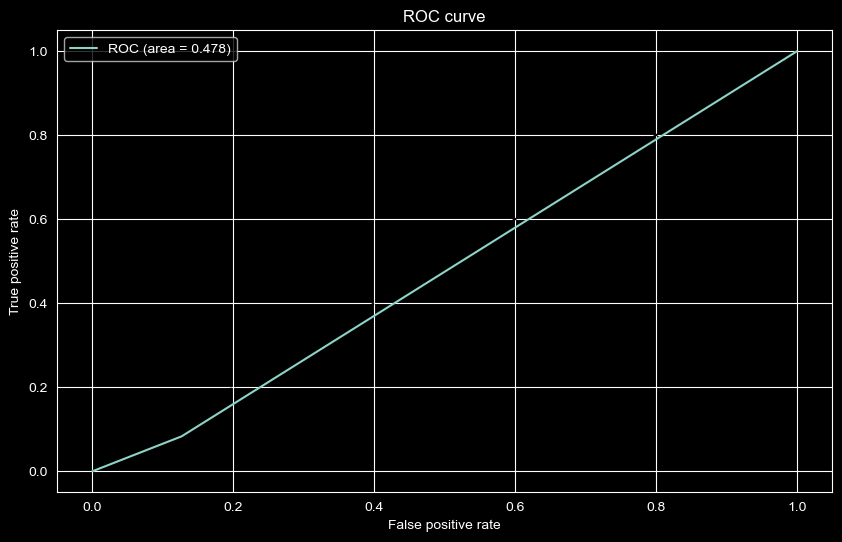

In [166]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc8))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [177]:
len(scores)

8

In [215]:
scoresdf = pd.DataFrame(scores)


In [216]:
scoresdf

0     1
0     195.905 0.666
1    3742.754 0.740
2  378015.625 0.779
3       2.792 0.796
4       0.548 0.534
5       0.557 0.206
6 1136797.125 0.551
7       0.611 0.083

In [218]:
aucscores = [auc,auc2,auc3,auc4,auc5,auc6,auc7,auc8]
print(aucscores)

[0.4949009754655631, 0.5905754261503597, 0.5159621637599763, 0.6275987782047493, 0.6522071140013793, 0.5954034880283772, 0.6158858015568036, 0.47822445561139026]


In [219]:
len(aucscores)

8

In [220]:
len(scores)

8

In [221]:
scoresdf.shape

(8, 3)

In [222]:
scoresdf["AUC"] = aucscores

In [223]:
scoresdf

0     1   Model   AUC
0     195.905 0.666  model1 0.495
1    3742.754 0.740  model2 0.591
2  378015.625 0.779  model3 0.516
3       2.792 0.796  model4 0.628
4       0.548 0.534  model5 0.652
5       0.557 0.206  model6 0.595
6 1136797.125 0.551  model7 0.616
7       0.611 0.083  model8 0.478

In [237]:
print(scores)

[[195.9048614501953, 0.6660000085830688], [3742.75439453125, 0.7401960492134094], [378015.625, 0.779411792755127], [2.791738271713257, 0.7960000038146973], [0.5481835603713989, 0.5343137383460999], [0.5571701526641846, 0.20588235557079315], [1136797.125, 0.5509999990463257], [0.611051619052887, 0.0833333358168602]]


In [243]:
print(scores[0][0])

195.9048614501953


In [244]:
losses = []
accuracyscores = []
for i in range(0,8):
    losses.append(scores[i][0])
    accuracyscores.append(scores[i][1])

In [246]:
print(len(losses),losses)

8 [195.9048614501953, 3742.75439453125, 378015.625, 2.791738271713257, 0.5481835603713989, 0.5571701526641846, 1136797.125, 0.611051619052887]


In [247]:
print(len(accuracyscores),accuracyscores)

8 [0.6660000085830688, 0.7401960492134094, 0.779411792755127, 0.7960000038146973, 0.5343137383460999, 0.20588235557079315, 0.5509999990463257, 0.0833333358168602]


In [248]:
models = ["Without Class Weights", "With Class Weights", "Increased Learning Rate", 
          "With Dropout", "Early Stop (val_loss)", "Early Stop (val_recall)", 
          "Focusing on Accuracy", "Optuna Refined"]

In [249]:
scoresdf3 = pd.DataFrame({"Models": models, 
                          "Loss": losses,
                          "Accuracy": accuracyscores,
                          "AUC Score": aucscores})

In [250]:
scoresdf3

Models        Loss  Accuracy  AUC Score
0    Without Class Weights     195.905     0.666      0.495
1       With Class Weights    3742.754     0.740      0.591
2  Increased Learning Rate  378015.625     0.779      0.516
3             With Dropout       2.792     0.796      0.628
4    Early Stop (val_loss)       0.548     0.534      0.652
5  Early Stop (val_recall)       0.557     0.206      0.595
6     Focusing on Accuracy 1136797.125     0.551      0.616
7           Optuna Refined       0.611     0.083      0.478

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/seaborn

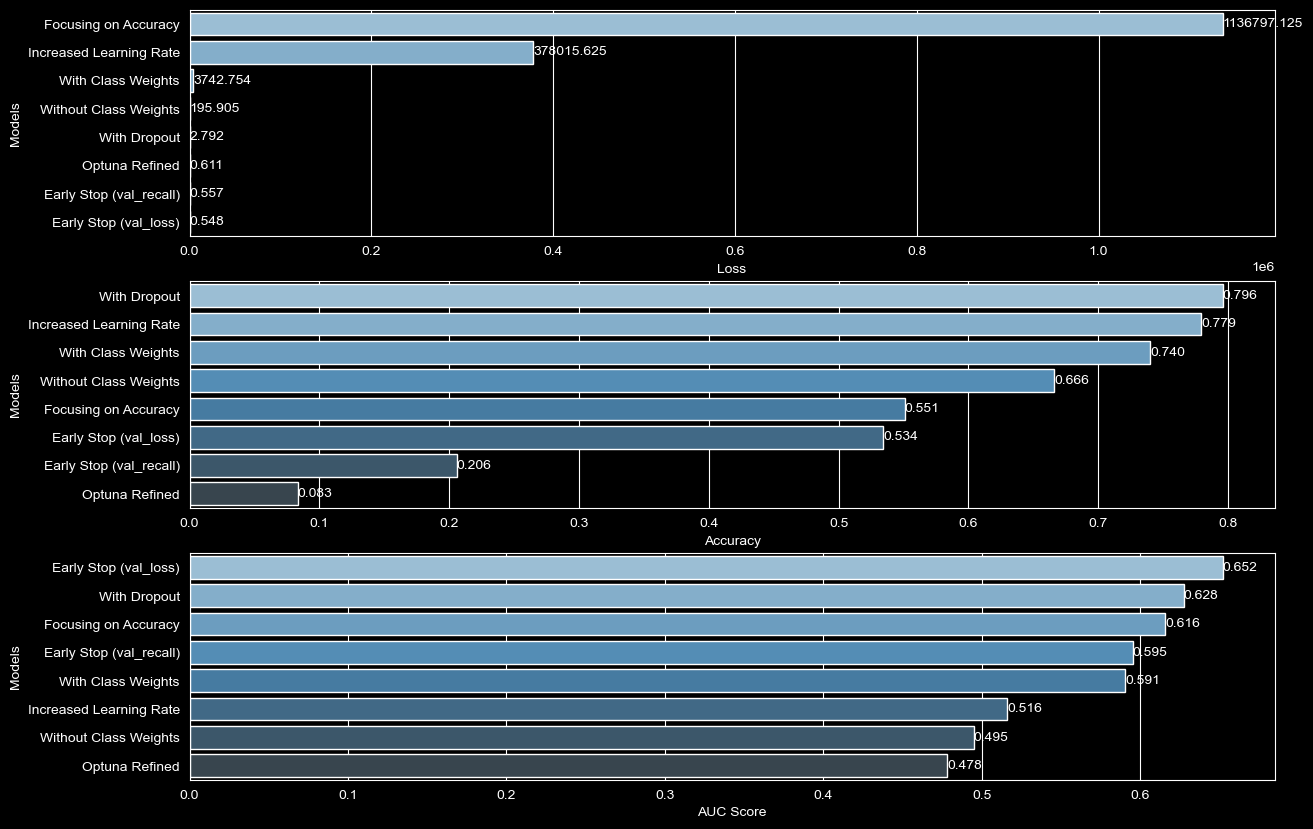

In [259]:
plt.figure(figsize=(14, 10))
plt.subplot(311)
scoresdf3 = scoresdf3.sort_values(by="Loss", ascending=False)
ax = sns.barplot(x="Loss", y="Models", data=scoresdf3, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
scoresdf3 = scoresdf3.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Models", data=scoresdf3, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
scoresdf3 = scoresdf3.sort_values(by="AUC Score", ascending=False)
ax = sns.barplot(x="AUC Score", y="Models", data=scoresdf3, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# Previous attempt metrics, disregard.

# Final Model and Model Deployment (Using Early Stopping with val_recall)

In [365]:
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["Recall"])

In [366]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=25, restore_best_weights=True
)

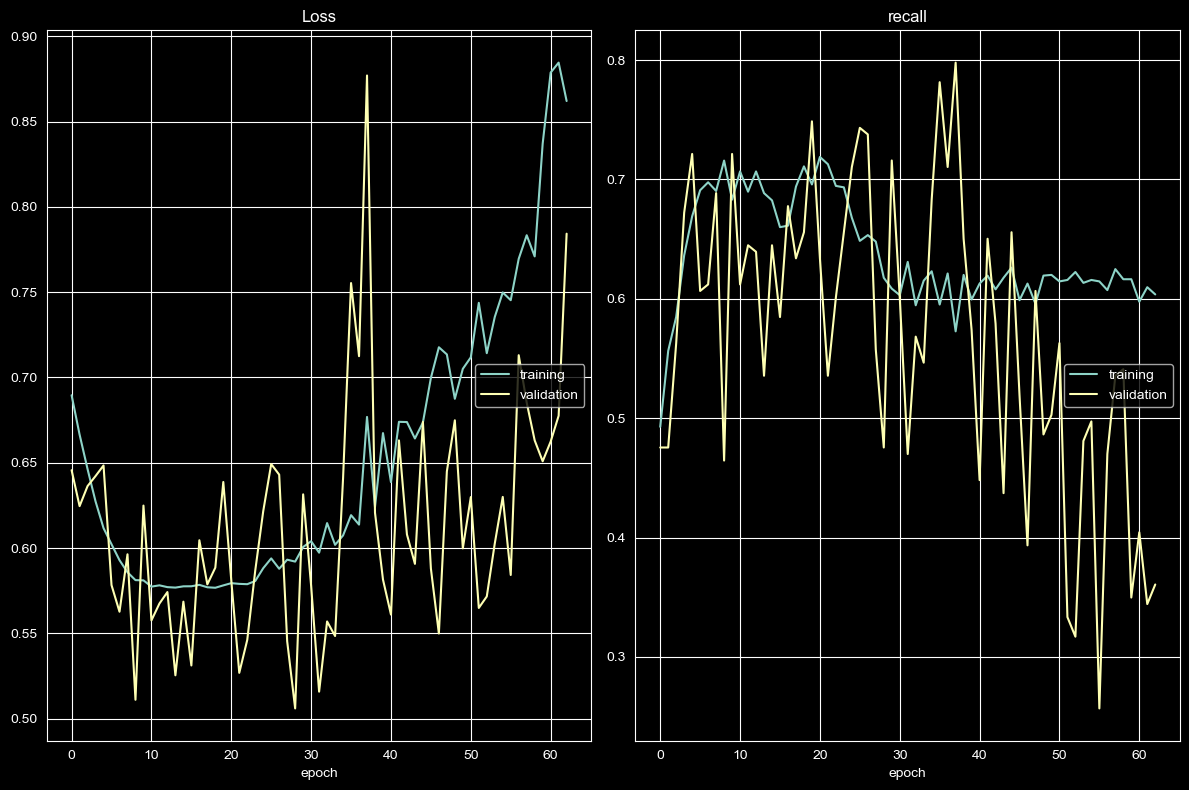

Loss
	training         	 (min:    0.577, max:    0.885, cur:    0.862)
	validation       	 (min:    0.506, max:    0.877, cur:    0.784)
recall
	training         	 (min:    0.493, max:    0.719, cur:    0.604)
	validation       	 (min:    0.257, max:    0.798, cur:    0.361)
64/64 [==============================] - 1s 13ms/step - loss: 0.8620 - recall: 0.6036 - val_loss: 0.7843 - val_recall: 0.3607
Epoch 63: early stopping


In [367]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200, class_weight=class_weights, verbose=1, callbacks=[early_stop, PlotLossesKeras()]
)

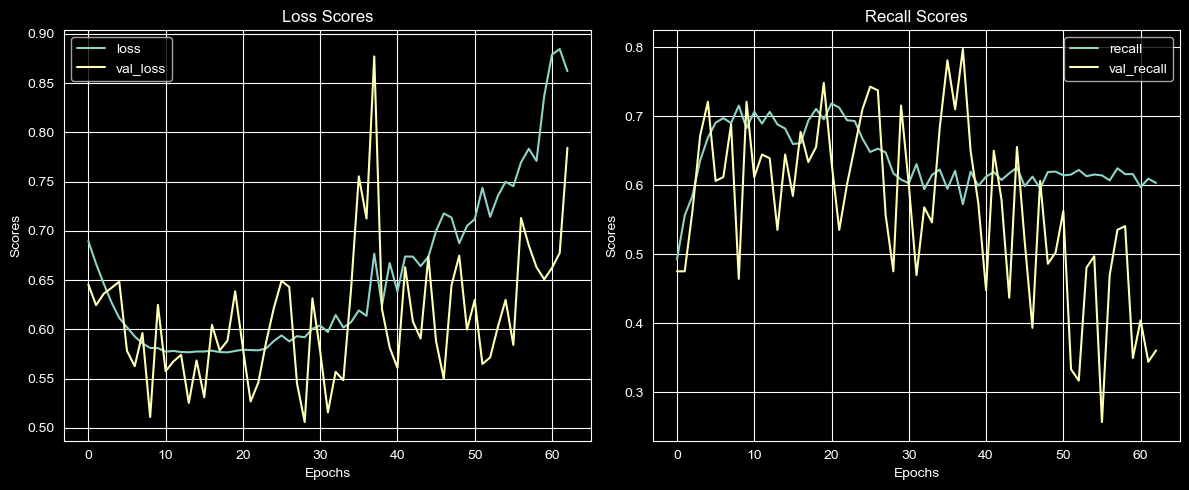

In [368]:
plot_subplotsrecall()

32/32 [==============================] - 0s 5ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

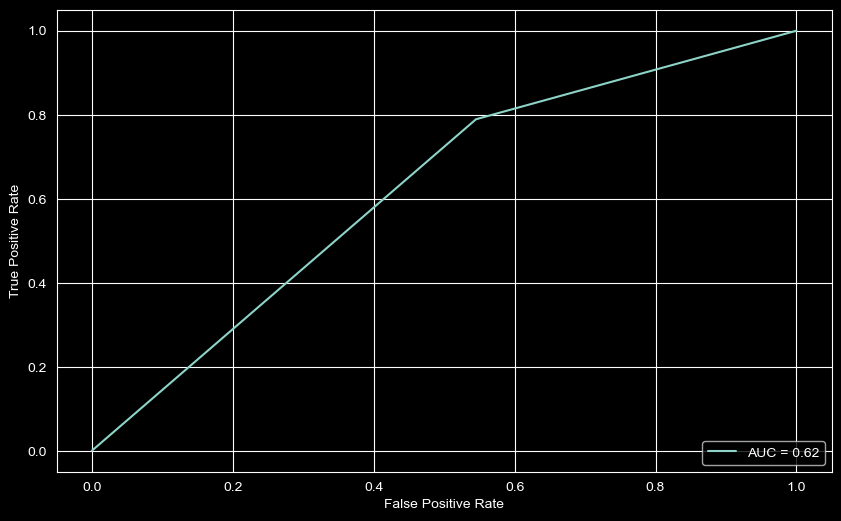

In [369]:
plotRoc()

In [370]:
evalreport()

loss:  0.8987979292869568
accuracy:  0.7892156839370728
32/32 [==============================] - 0s 2ms/step
[[362 434]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       796
           1       0.27      0.79      0.40       204

    accuracy                           0.52      1000
   macro avg       0.58      0.62      0.50      1000
weighted avg       0.77      0.52      0.56      1000



/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

254/254 [==============================] - 0s 2ms/step


/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

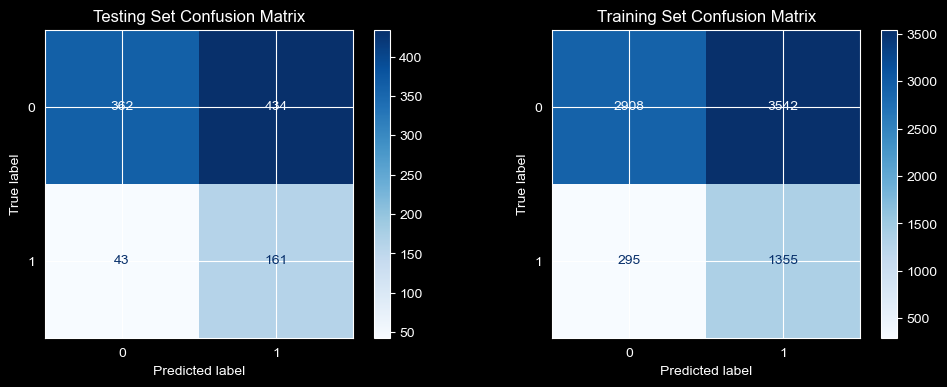

In [371]:
plotconfusion()

In [372]:
import pickle

pickle.dump(minmax, open("scaler_churn", "wb"))

In [373]:
model.save("model_churn.h5")

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [374]:
from keras.models import load_model

In [375]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [405]:
single_customer = df.iloc[35:36,:].drop("Exited", axis=1)
single_customer

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
35          475    France       0   45       0 134264.040              1   

    HasCrCard  IsActiveMember  EstimatedSalary  
35          1               0        27822.990

In [406]:
single_customer = column_trans.transform(single_customer)

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/sklearn/uti

In [407]:
single_customer.shape

(1, 12)

In [408]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 0.14712644, 0.95238095,
        0.        , 0.94987323, 0.        , 0.10794067, 0.        ,
        1.        , 0.        ]])

In [409]:
single_customer.shape

(1, 12)

## Prediction

In [410]:
(model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 20ms/step


array([[1]], dtype=int32)

In [411]:
df["Exited"].iloc[35:36]


35    1
Name: Exited, dtype: int64

The model made an accuracte prediction.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___